[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/4.3%20ETF%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%8B%9C%EA%B0%81%ED%99%94-input.ipynb)


## ETF 분석과 시각화

* keyword
    * seaborn - barplot, boxplot, violinplot
    * **seaborn PairGrid vs matplotlib - subplots**
    * seaborn FacetGrid
        * **catplot 범주형 데이터 시각화 (kind: count, bar, box, boxen, violin)**
        * relplot 연속된 수치 데이터 시각화 (kind: scatter, line) <= KRX 전체 종목 분석에서 다룸
    * pandas - value_counts, cross_tab, groupby, pivot_table
  
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

* seaborn 에 대해 좀 더 알고 싶다면 다음의 튜토리얼을 참고해 보세요.
* [User guide and tutorial — seaborn documentation](https://seaborn.pydata.org/tutorial.html)



* 특정 시점의 데이터를 저장해 분석합니다.
* 분석하는 시점에 따라 내용이 달라지는 점에 유의하세요!
* 내가 수집한 시점의 데이터를 분석하기 때문에 매일 분석한다면 일자별 리포트를 만들어 볼 수도 있을거에요.
* [ETF : 네이버 금융](https://finance.naver.com/sise/etf.nhn)


## ⚠️ 주의사항 ⚠️ 
*  분석내용은 데이터 수집 시점에 따라 달라집니다.

## 라이브러리 로드

In [1]:
# 필요한 도구를 로드합니다.
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# seaborn 의 버전을 확인합니다. 
# 0.11.0 이상의 버전에서 변경된 내용이 많으니 0.11 이상의 버전을 사용해 주세요.
sns.__version__

'0.11.2'

In [3]:
pd.__version__

'1.4.2'

## 시각화를 위한 한글폰트 설정

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 사용가능한 그래프 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
# 운영체제에 맞는 font_family 찾기 
font_family = get_font_family()
font_family

'Malgun Gothic'

In [5]:
# 그래프 스타일 설정
# plt.style.use("fivethirtyeight")
plt.style.use("ggplot")

# dark mode 사용자를 위한 스타일 추천
# plt.style.use("dark_background")


plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용


<AxesSubplot:title={'center':'한글'}>

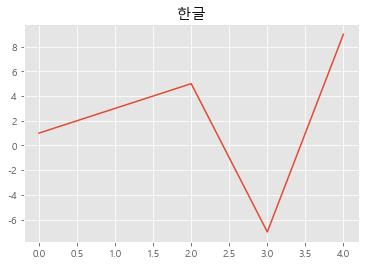

In [6]:
# 한글폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

## 데이터 로드

In [7]:
# 이전 수업에서 수집해서 저장해둔 csv 파일을 읽어옵니다.
# itemcode 숫자 앞의 0 이 지워진다면 
# dtype={"종목코드": np.object} 로 타입을 지정해 주면 문자형태로 읽어옵니다.
df = pd.read_csv('etf_2022-06-24.csv', dtype={"종목코드":object})
df.shape

(575, 17)

In [17]:
# 인덱스 번호 상단 5개의 데이터를 가져옵니다.
# 제대로 read되었는지 각 column정보들을 확인합니다.
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,30640,5,-250,-0.81,30607.0,-14.4298,9784052,301620,47247,국내 시장지수,KODEX,False,False,False
1,371460,4,TIGER 차이나전기차SOLACTIVE,17700,2,700,4.12,17844.0,12.6573,13690582,238235,42388,해외 주식,TIGER,False,False,False
2,122630,3,KODEX 레버리지,14135,5,-185,-1.29,14147.0,-28.0583,57013787,815169,21909,국내 파생,KODEX,False,True,False
3,133690,4,TIGER 미국나스닥100,67055,2,955,1.44,67176.0,-15.3487,118882,7959,19929,해외 주식,TIGER,False,False,False
4,252670,3,KODEX 200선물인버스2X,3385,2,40,1.20,3386.0,34.3373,390559840,1305629,19779,국내 파생,KODEX,True,False,False


In [18]:
# 인덱스 하단의 5개 데이터를 가져옵니다.
# 데이터가 제대로 로드되었는지 확인합니다.
df.tail()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
570,252720,2,KBSTAR 모멘텀밸류,11940,5,-220,-1.81,11943.0,-12.1324,51,0,12,국내 업종/테마,KBSTAR,False,False,False
571,284990,2,KBSTAR 200에너지화학,10570,5,-230,-2.13,10535.0,-1.1442,1033,11,11,국내 업종/테마,KBSTAR,False,False,False
572,287330,2,KBSTAR 200생활소비재,6405,3,0,0.00,6398.0,-9.3675,39,0,9,국내 업종/테마,KBSTAR,False,False,False
573,287320,2,KBSTAR 200산업재,10720,5,-280,-2.55,10728.0,-6.5103,244,2,9,국내 업종/테마,KBSTAR,False,False,False
574,287310,2,KBSTAR 200경기소비재,9030,5,-65,-0.71,9033.0,-4.7046,510,4,7,국내 업종/테마,KBSTAR,False,False,False


In [19]:
# info를 통해서 각 column들의 데이터타입과 결측치, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   종목코드        575 non-null    object 
 1   탭코드         575 non-null    int64  
 2   종목명         575 non-null    object 
 3   현재가         575 non-null    int64  
 4   등락구분        575 non-null    int64  
 5   전일비         575 non-null    int64  
 6   등락률         575 non-null    float64
 7   순자산가치(NAV)  575 non-null    float64
 8   3개월수익률      547 non-null    float64
 9   거래량         575 non-null    int64  
 10  거래대금(백만)    575 non-null    int64  
 11  시가총액(억)     575 non-null    int64  
 12  유형          575 non-null    object 
 13  브랜드         575 non-null    object 
 14  인버스         575 non-null    bool   
 15  레버리지        575 non-null    bool   
 16  환헤지H        575 non-null    bool   
dtypes: bool(3), float64(3), int64(7), object(4)
memory usage: 64.7+ KB


## 결측치 확인

In [ ]:
(True + True + False) / 3

In [21]:
# 결측치를 확인합니다.
df.isnull().sum()

종목코드           0
탭코드            0
종목명            0
현재가            0
등락구분           0
전일비            0
등락률            0
순자산가치(NAV)     0
3개월수익률        28
거래량            0
거래대금(백만)       0
시가총액(억)        0
유형             0
브랜드            0
인버스            0
레버리지           0
환헤지H           0
dtype: int64

In [23]:
# 결측치의 비율을 봅니다.
df.isnull().mean() * 100

종목코드          0.000000
탭코드           0.000000
종목명           0.000000
현재가           0.000000
등락구분          0.000000
전일비           0.000000
등락률           0.000000
순자산가치(NAV)    0.000000
3개월수익률        4.869565
거래량           0.000000
거래대금(백만)      0.000000
시가총액(억)       0.000000
유형            0.000000
브랜드           0.000000
인버스           0.000000
레버리지          0.000000
환헤지H          0.000000
dtype: float64

<AxesSubplot:>

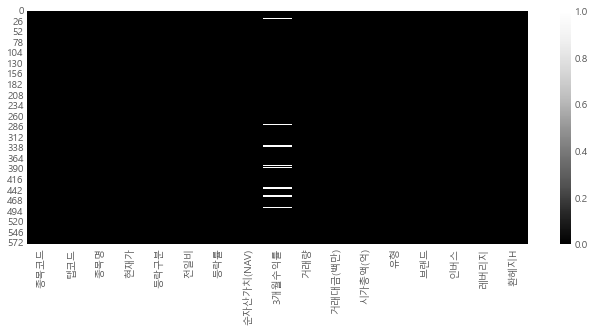

In [27]:
# heatmap을 통한 결측치 시각화
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cmap="Greys_r")

## 범주형 데이터의 빈도수
### 범주형 변수 찾기

In [29]:
# describe를 통해 범주형 변수에 대한 기술통계 값을 구하기
df.describe(include=object)

,종목코드,종목명,유형,브랜드
count,575,575,575,575
unique,575,575,7,21
top,069500,KODEX 200,국내 업종/테마,TIGER
freq,1,1,207,141


In [30]:
df.describe(exclude=np.number)

,종목코드,종목명,유형,브랜드,인버스,레버리지,환헤지H
count,575,575,575,575,575,575,575
unique,575,575,7,21,2,2,2
top,069500,KODEX 200,국내 업종/테마,TIGER,False,False,False
freq,1,1,207,141,534,537,508


In [31]:
# unique(중복을 제외한 값)에 대한 빈도수 구하기
# object type 이 아니더라도 nunique 값이 작다면 범주형 변수인지 확인해 봅니다.
df.nunique()

종목코드          575
탭코드             7
종목명           575
현재가           529
등락구분            3
전일비           172
등락률           380
순자산가치(NAV)    563
3개월수익률        547
거래량           529
거래대금(백만)      303
시가총액(억)       376
유형              7
브랜드            21
인버스             2
레버리지            2
환헤지H            2
dtype: int64

### ETF 상품 유형별 빈도수(한 개의 변수)

In [33]:
# df["유형"].value_counts() 의 결과와 같게 시각화 할 수 있습니다.
df['유형'].value_counts()

국내 업종/테마    207
해외 주식       147
국내 시장지수      64
채권           62
기타           40
국내 파생        37
원자재          18
Name: 유형, dtype: int64

<AxesSubplot:xlabel='count', ylabel='유형'>

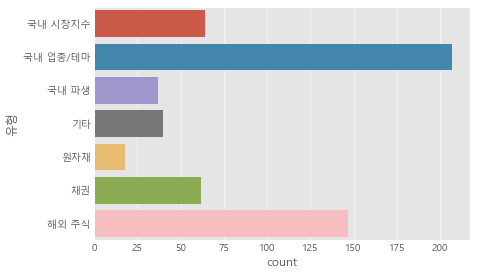

In [34]:
# sns.countplot 으로 빈도수를 시각화 합니다.
sns.countplot(data=df.sort_values("유형"), y="유형")

<AxesSubplot:xlabel='count', ylabel='유형'>

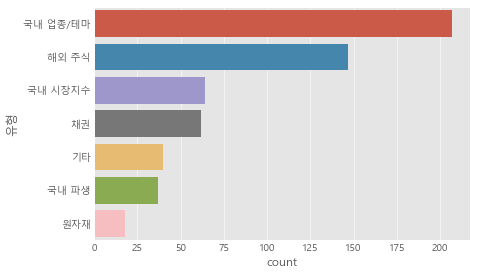

In [35]:
sns.countplot(data=df, y="유형", order=df["유형"].value_counts().index)

In [36]:
# value_counts 로 빈도수를 직접 계산합니다.
df['유형'].value_counts()

국내 업종/테마    207
해외 주식       147
국내 시장지수      64
채권           62
기타           40
국내 파생        37
원자재          18
Name: 유형, dtype: int64

In [37]:
# value_counts(normalize=True) 로 빈도수의 비율을 구합니다.
df["유형"].value_counts(normalize=True) * 100

국내 업종/테마    36.000000
해외 주식       25.565217
국내 시장지수     11.130435
채권          10.782609
기타           6.956522
국내 파생        6.434783
원자재          3.130435
Name: 유형, dtype: float64

### 두 개의 변수 빈도수와 비율

<AxesSubplot:xlabel='count', ylabel='유형'>

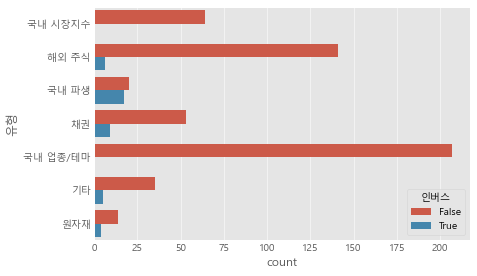

In [40]:
# 유형 컬럼의 빈도수를 봅니다.
# seaborn countplot의 hue를 이용하여 인버스여부에 따라 다른 색상으로 표시해 봅니다.
sns.countplot(data=df, y="유형", hue="인버스")

In [41]:
# pandas crosstab을 이용하여 위 그래프의 수치를 확인 할 수 있습니다.
# seaborn 은 아래와 같은 연산을 하지 않더라도 알아서 통계적 연산을 시각화 해줍니다.
pd.crosstab(df['유형'], df['인버스'])

인버스,False,True
유형,,
국내 시장지수,64,0
국내 업종/테마,207,0
국내 파생,20,17
기타,35,5
원자재,14,4
채권,53,9
해외 주식,141,6


In [42]:
pd.crosstab(df['인버스'], df['유형'])

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
인버스,,,,,,,
False,64,207,20,35,14,53,141
True,0,0,17,5,4,9,6


In [44]:
# value_counts 처럼 normalize 를 사용해 비율을 구할 수도 있습니다.
n = pd.crosstab(df['인버스'], df['유형'], normalize=True) * 100
n

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
인버스,,,,,,,
False,11.130435,36.0,3.478261,6.086957,2.434783,9.217391,24.521739
True,0.000000,0.0,2.956522,0.869565,0.695652,1.565217,1.043478


In [46]:
n.sum().sum()

100.0

<AxesSubplot:xlabel='count', ylabel='유형'>

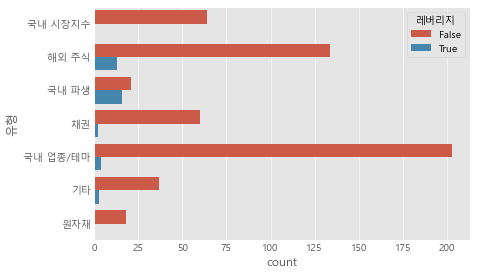

In [48]:
# 동일하게 유형 데이터를 레버리지 여부에 따라 그립니다.
sns.countplot(data=df, y='유형', hue='레버리지')

In [49]:
# 레버리지, 유형에 대한 빈도수를 구힙니다.
pd.crosstab(df['레버리지'], df['유형'])

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
레버리지,,,,,,,
False,64,203,21,37,18,60,134
True,0,4,16,3,0,2,13


In [50]:
# 레버리지, 유형에 대한 빈도수의 비율을 구합니다.
pd.crosstab(df['레버리지'], df['유형'], normalize=True) * 100

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
레버리지,,,,,,,
False,11.130435,35.304348,3.652174,6.434783,3.130435,10.434783,23.304348
True,0.000000,0.695652,2.782609,0.521739,0.000000,0.347826,2.260870


### 브랜드별 빈도수

<AxesSubplot:xlabel='count', ylabel='브랜드'>

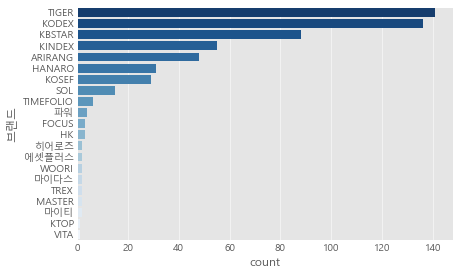

In [56]:
# 브랜드별 ETF 빈도수
sns.countplot(data=df, y="브랜드",
              palette='Blues_r',
             order=df["브랜드"].value_counts().index)

In [57]:
df["브랜드"].value_counts()

TIGER        141
KODEX        136
KBSTAR        88
KINDEX        55
ARIRANG       48
HANARO        31
KOSEF         29
SOL           15
TIMEFOLIO      6
파워             4
FOCUS          3
HK             3
히어로즈           2
에셋플러스          2
WOORI          2
마이다스           2
TREX           2
MASTER         2
마이티            2
KTOP           1
VITA           1
Name: 브랜드, dtype: int64

### 인버스, 브랜드의 ETF 빈도 비율


* 인버스 ETF란? 주식관련 장내 외 파생상품 투자 및 증권차입매도 등을 통해 기초지수(KOSPI 200지수)의 일일 변동률(일별수익률)을 음의 1배수 즉, 역방향으로 추적하는 ETF를 말한다. 예를 들어, KOSPI 200지수가 1% 상승할 경우 인버스 ETF는 마이너스 1% 수익률, 반대로 KOSPI 200 지수가 1% 하락시 인버스 ETF는 플러스 1%의 수익률을 목표로 운영된다.
[네이버 지식백과] 인버스ETF (매일경제, 매경닷컴)
* 출처 : https://terms.naver.com/entry.nhn?docId=20336&cid=43659&categoryId=43659

<AxesSubplot:xlabel='count', ylabel='브랜드'>

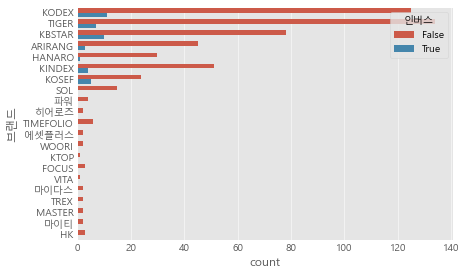

In [58]:
# 브랜드 column의 빈도수를 인버스에 따른 구분으로 그려봅니다.
sns.countplot(data=df, y='브랜드', hue='인버스')

In [59]:
# 인버스, 브랜드의 금융상품 빈도수
pd.crosstab(df['인버스'], df['브랜드'])

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,MASTER,...,TIGER,TIMEFOLIO,TREX,VITA,WOORI,마이다스,마이티,에셋플러스,파워,히어로즈
인버스,,,,,,,,,,,,,,,,,,,,,
False,45,3,30,3,78,51,125,24,1,2,...,134,6,2,1,2,2,2,2,4,2
True,3,0,1,0,10,4,11,5,0,0,...,7,0,0,0,0,0,0,0,0,0


In [61]:
# 인버스, 브랜드의 금융상품 빈도 비율
in_brand_norm = pd.crosstab(df['인버스'], df['브랜드'], normalize=True) * 100
in_brand_norm

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,MASTER,...,TIGER,TIMEFOLIO,TREX,VITA,WOORI,마이다스,마이티,에셋플러스,파워,히어로즈
인버스,,,,,,,,,,,,,,,,,,,,,
False,7.826087,0.521739,5.217391,0.521739,13.565217,8.869565,21.739130,4.173913,0.173913,0.347826,...,23.304348,1.043478,0.347826,0.173913,0.347826,0.347826,0.347826,0.347826,0.695652,0.347826
True,0.521739,0.000000,0.173913,0.000000,1.739130,0.695652,1.913043,0.869565,0.000000,0.000000,...,1.217391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 레버리지, 브랜드의 ETF 빈도 비율
* 레버리지 ETF란? 일반 ETF가 코스피200과 같은 지수 내 대표 주식을 보유함으로써 지수와 비슷한 수익률을 내는 것을 목표로 하는 데 비해 레버리지ETF는 선물 등 파생상품에 투자해 지수보다 높은 수익을 추구하는 ETF다. 상승장에서는 높은 수익률을 기대할 수 있지만 하락장에서는 손실도 커져 고위험ㆍ고수익 상품으로 분류된다.
[네이버 지식백과] 레버리지 ETF (매일경제, 매경닷컴)
* 출처 : https://terms.naver.com/entry.nhn?docId=2059802&cid=43659&categoryId=43659

<AxesSubplot:xlabel='count', ylabel='브랜드'>

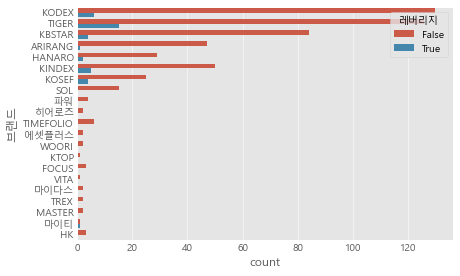

In [62]:
# 브랜드별 레버리지 여부에 따른 빈도수를 시각화 합니다.
sns.countplot(data=df, y="브랜드", hue="레버리지")

In [63]:
# 레버리지, 브랜드의 ETF 빈도수(crosstab)
pd.crosstab(df['레버리지'], df['브랜드'])

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,MASTER,...,TIGER,TIMEFOLIO,TREX,VITA,WOORI,마이다스,마이티,에셋플러스,파워,히어로즈
레버리지,,,,,,,,,,,,,,,,,,,,,
False,47,3,29,3,84,50,130,25,1,2,...,126,6,2,1,2,2,1,2,4,2
True,1,0,2,0,4,5,6,4,0,0,...,15,0,0,0,0,0,1,0,0,0


<AxesSubplot:ylabel='브랜드'>

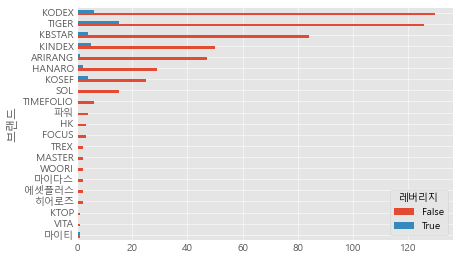

In [66]:
# 레버리지, 브랜드의 ETF 빈도수(crosstab)
pd.crosstab(df['레버리지'], df['브랜드']).T.sort_values(by=False).plot.barh()

In [67]:
# 레버리지, 브랜드의 ETF 비율
pd.crosstab(df['레버리지'], df['브랜드'], normalize=True) * 100

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,MASTER,...,TIGER,TIMEFOLIO,TREX,VITA,WOORI,마이다스,마이티,에셋플러스,파워,히어로즈
레버리지,,,,,,,,,,,,,,,,,,,,,
False,8.173913,0.521739,5.043478,0.521739,14.608696,8.695652,22.608696,4.347826,0.173913,0.347826,...,21.913043,1.043478,0.347826,0.173913,0.347826,0.347826,0.173913,0.347826,0.695652,0.347826
True,0.173913,0.000000,0.347826,0.000000,0.695652,0.869565,1.043478,0.695652,0.000000,0.000000,...,2.608696,0.000000,0.000000,0.000000,0.000000,0.000000,0.173913,0.000000,0.000000,0.000000


## 수치형 변수의 기술통계

In [69]:
# describe로 수치형 변수의 기술통계 구하기
desc = df.describe()
desc

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,547.000000,5.750000e+02,5.750000e+02,575.000000
mean,3.337391,18783.478261,3.873043,-56.956522,-0.614330,18782.366957,-9.799358,1.424724e+06,9.797892e+03,1261.160000
std,1.777985,23965.543942,1.432410,246.962466,1.737742,23973.216300,11.382219,1.764621e+07,7.829350e+04,3859.791682
min,1.000000,2050.000000,2.000000,-2030.000000,-7.100000,513.000000,-39.491300,0.000000e+00,0.000000e+00,7.000000
25%,2.000000,7997.500000,2.000000,-175.000000,-1.570000,8008.000000,-15.389200,4.060000e+02,6.000000e+00,74.000000
50%,3.000000,10450.000000,5.000000,-65.000000,-0.620000,10443.000000,-11.372500,4.677000e+03,5.400000e+01,171.000000
75%,4.000000,14727.500000,5.000000,55.000000,0.420000,14762.500000,-3.775550,3.839850e+04,3.980000e+02,666.000000
max,7.000000,108420.000000,5.000000,2090.000000,4.290000,108907.000000,34.423000,3.905598e+08,1.305629e+06,47247.000000


## 수치형 변수로 히스토그램 그리기

* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

In [77]:
# 수치형 컬럼만 리스트로 만들기
num_cols = desc.columns.tolist()
num_cols

['탭코드',
 '현재가',
 '등락구분',
 '전일비',
 '등락률',
 '순자산가치(NAV)',
 '3개월수익률',
 '거래량',
 '거래대금(백만)',
 '시가총액(억)']

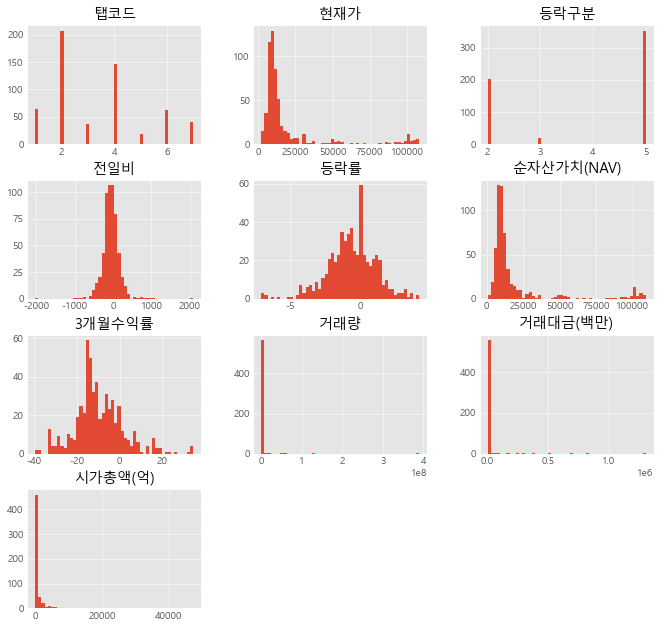

In [79]:
# 히스토그램을 그려보면 수치 데이터로 되어있지만 범주형 데이터를 찾아볼 수 있습니다.
h = df[num_cols].hist(figsize=(10, 10), bins=50)

## 범주형 vs 수치형 변수
### seaborn의 barplot 이해하기

Text(0.5, 1.0, '브랜드별 평균 3개월 수익률')

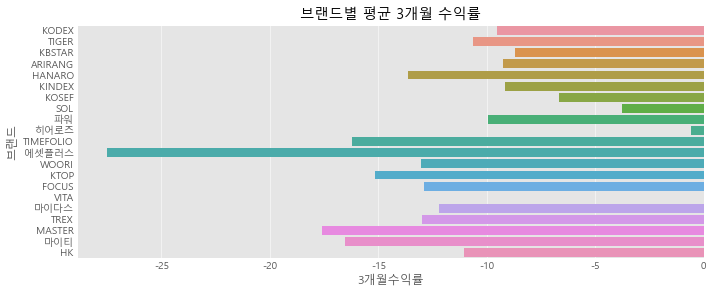

In [86]:
# seaborn의 bar chart를 이용하여 각 브랜드에 대한 3개월수익률의 평균값을 볼 수 있습니다.
# 검은색 막대는 ci로 신뢰구간을 의미합니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=df,
           y="브랜드",
           x="3개월수익률",
           orient="h", ci=None).set_title("브랜드별 평균 3개월 수익률")

### barplot 그래프의 값을 groupby 로 직접 구하기

In [92]:
# 위 그래프의 평균 값을 직접 계산을 통해 구해 봅니다.
brand_3month_mean = df.groupby("브랜드")['3개월수익률'].mean()
brand_3month_mean

브랜드
ARIRANG      -9.237211
FOCUS       -12.877833
HANARO      -13.628125
HK          -11.031267
KBSTAR       -8.711943
KINDEX       -9.157362
KODEX        -9.545198
KOSEF        -6.652837
KTOP        -15.168200
MASTER      -17.612850
SOL          -3.750036
TIGER       -10.634403
TIMEFOLIO   -16.201775
TREX        -12.990050
VITA               NaN
WOORI       -13.048400
마이다스        -12.198250
마이티         -16.540350
에셋플러스       -27.505150
파워           -9.952900
히어로즈         -0.573900
Name: 3개월수익률, dtype: float64

<AxesSubplot:title={'center':'브랜드별 평균 3개월 수익률'}, ylabel='브랜드'>

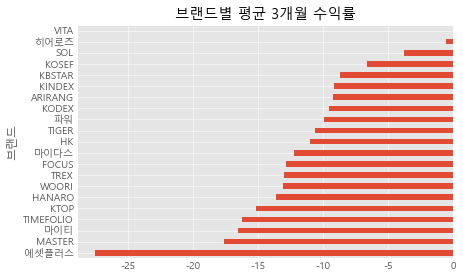

In [95]:
# 위에서 구한 그룹(브랜드)별 평균 3개월 수익률을 그래프로 표현합니다.
brand_3month_mean.sort_values().plot.barh(title="브랜드별 평균 3개월 수익률")

In [96]:
# 브랜드가 마이티인 경우의 데이터를 확인합니다.
df[df['브랜드'] == '마이티']

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
465,159800,1,마이티 코스피100,23495,3,0,0.00,23306.0,-14.2300,100,2,66,국내 시장지수,마이티,False,False,False
537,292340,3,마이티 200커버드콜ATM레버리지,7380,5,-175,-2.32,7315.0,-18.8507,3,0,44,국내 파생,마이티,False,True,False


<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

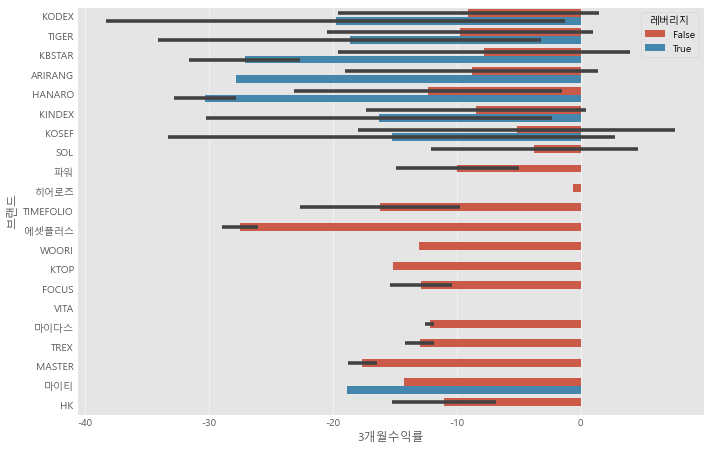

In [98]:
# 브랜드 대비 3개월수익률에 대한 정보를 레버리지 값의 차이를 barplot으로 봅니다.
# 레버리지 유/무에 따라서 평균 3개월 수익률은 많은 차이가 없지만,
# 표준편차의 경우 레버리지가 있을경우 굉장히 편차(ci="sd")가 심함을 알 수 있습니다.
# 레버리지 상품은 오를 때 더 많이 오르고 내릴 때 더 많이 내립니다.
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="3개월수익률", y="브랜드", hue="레버리지", ci="sd")

* [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [216]:
# 위에서 그린 그래프의 값을 groupby로 구합니다.
g = df.groupby(['브랜드', '레버리지'])['3개월수익률'].mean().to_frame()
g.style.background_gradient(cmap="Greens")

### boxplot으로 그리기

#### 기술통계 용어

* 백분위 수 : 데이터를 백등분 한 것
* 사분위 수 : 데이터를 4등분 한 것
* 중위수 : 데이터의 정 가운데 순위에 해당하는 값.(관측치의 절반은 크거나 같고 나머지 절반은 작거나 같다.)
* 제 3사분위 수 (Q3) : 중앙값 기준으로 상위 50% 중의 중앙값, 전체 데이터 중 상위 25%에 해당하는 값
* 제 1사분위 수 (Q1) : 중앙값 기준으로 하위 50% 중의 중앙값, 전체 데이터 중 하위 25%에 해당하는 값
* 사분위 범위 수(IQR) : 데이터의 중간 50% (Q3 - Q1)

* 출처 : [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

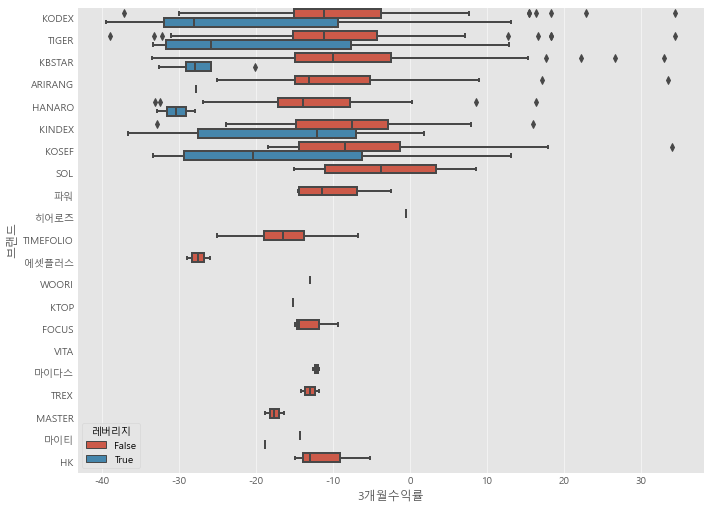

In [107]:
# 브랜드별 3개월 수익률을 레버리지에 따라 다른 색상으로 시각화 합니다.
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='3개월수익률', y='브랜드', hue='레버리지')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

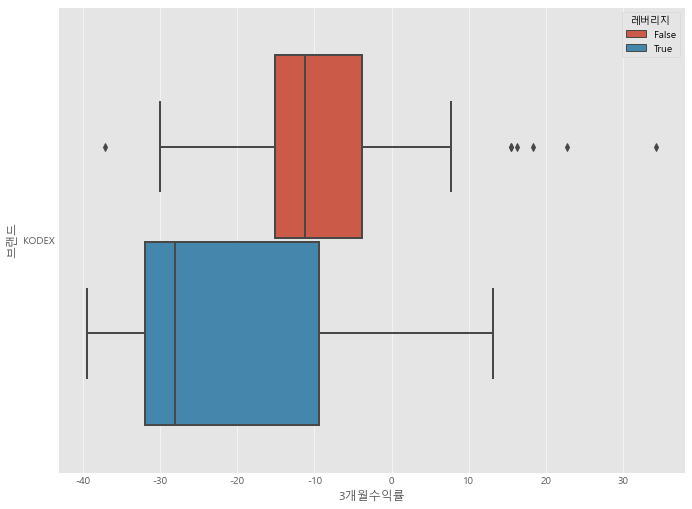

In [217]:
df_KODEX = df[df['브랜드'] == 'KODEX']
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_KODEX, x='3개월수익률', y='브랜드', hue='레버리지')

#### boxplot 보는 방법

* 사분위수 범위(IQR, Interquartile range, Q3-Q1)
* 이상치를 제외한 최댓값  = Q3 + 1.5IQR
* 이상치를 제외한 최솟값  = Q1 - 1.5IQR

### 3개월 수익률에 대한 기술통계 값 구하기

In [110]:
# 위에서 그린 boxplot의 값을 직접 구해봅니다.
# brand_3month_desc
df.groupby(['브랜드', '레버리지'])['3개월수익률'].describe()

count       mean        std      min        25%       50%  \
브랜드       레버리지                                                               
ARIRANG   False   43.0  -8.805140  10.309681 -25.0320 -14.925900 -13.08750   
          True     1.0 -27.816300        NaN -27.8163 -27.816300 -27.81630   
FOCUS     False    3.0 -12.877833   3.032041 -14.8826 -14.621900 -14.36120   
HANARO    False   26.0 -12.342873  11.034158 -33.0789 -17.185225 -13.86290   
          True     2.0 -30.336400   3.493815 -32.8069 -31.571650 -30.33640   
HK        False    3.0 -11.031267   5.118187 -14.8999 -13.933050 -12.96620   
KBSTAR    False   80.0  -7.790596  11.837773 -33.4436 -14.971200  -9.97710   
          True     4.0 -27.138875   5.166085 -32.6316 -29.125650 -27.88440   
KINDEX    False   50.0  -8.443384   8.994456 -32.8509 -14.739475  -7.47490   
          True     5.0 -16.297140  15.609518 -36.6739 -27.584100 -12.05140   
KODEX     False  127.0  -9.061331  10.570720 -37.0847 -15.065700 -11.20440   
          True     6.0 -19.787033  20.327163 -39.4913 -31.910000 -28.02530   
KOSEF     False   23.0  -5.158500  13.094410 -18.4458 -14.424200  -8.42790   
          True     4.0 -15.245275  20.845072 -33.3634 -29.392750 -20.36500   
KTOP      False    1.0 -15.168200        NaN -15.1682 -15.168200 -15.16820   
MASTER    False    2.0 -17.612850   1.692036 -18.8093 -18.211075 -17.61285   
SOL       False   11.0  -3.750036   8.764388 -15.1107 -11.015950  -3.77470   
TIGER     False  124.0  -9.728711  10.759507 -38.9488 -15.243100 -11.17620   
          True    14.0 -18.656243  16.069620 -33.4211 -31.692875 -25.83470   
TIMEFOLIO False    4.0 -16.201775   7.485020 -25.0864 -18.960325 -16.46560   
TREX      False    2.0 -12.990050   1.676197 -14.1753 -13.582675 -12.99005   
VITA      False    0.0        NaN        NaN      NaN        NaN       NaN   
WOORI     False    1.0 -13.048400        NaN -13.0484 -13.048400 -13.04840   
마이다스      False    2.0 -12.198250   0.549917 -12.5871 -12.392675 -12.19825   
마이티       False    1.0 -14.230000        NaN -14.2300 -14.230000 -14.23000   
          True     1.0 -18.850700        NaN -18.8507 -18.850700 -18.85070   
에셋플러스     False    2.0 -27.505150   2.102582 -28.9919 -28.248525 -27.50515   
파워        False    4.0  -9.952900   5.724196 -14.5235 -14.411075 -11.39210   
히어로즈      False    1.0  -0.573900        NaN  -0.5739  -0.573900  -0.57390   

                       75%      max  
브랜드       레버리지                       
ARIRANG   False  -5.174150  33.4661  
          True  -27.816300 -27.8163  
FOCUS     False -11.875450  -9.3897  
HANARO    False  -7.765250  16.3234  
          True  -29.101150 -27.8659  
HK        False  -9.096950  -5.2277  
KBSTAR    False  -2.482175  32.9317  
          True  -25.897625 -20.1551  
KINDEX    False  -2.920925  15.9924  
          True   -6.954000   1.7777  
KODEX     False  -3.806200  34.3373  
          True   -9.353450  13.1541  
KOSEF     False  -1.311150  33.9393  
          True   -6.217525  13.1123  
KTOP      False -15.168200 -15.1682  
MASTER    False -17.014625 -16.4164  
SOL       False   3.371250   8.5998  
TIGER     False  -4.322150  34.4230  
          True   -7.623200  12.8277  
TIMEFOLIO False -13.707050  -6.7895  
TREX      False -12.397425 -11.8048  
VITA      False        NaN      NaN  
WOORI     False -13.048400 -13.0484  
마이다스      False -12.003825 -11.8094  
마이티       False -14.230000 -14.2300  
          True  -18.850700 -18.8507  
에셋플러스     False -26.761775 -26.0184  
파워        False  -6.933925  -2.5039  
히어로즈      False  -0.573900  -0.5739

<img src="https://miro.medium.com/max/1400/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="400">

* 이미지 출처 : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

### KODEX ETF 따로 분석하기

* ⚠️ 주의사항 ⚠️  분석내용은 데이터 수집 시점에 따라 달라집니다.

In [218]:
# KODEX 서브셋을 만듭니다.
kodex = df[df['브랜드'] == 'KODEX']

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

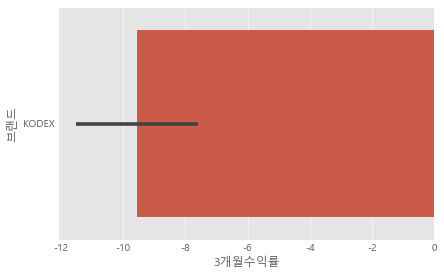

In [219]:
sns.barplot(data=kodex, x='3개월수익률', y='브랜드')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

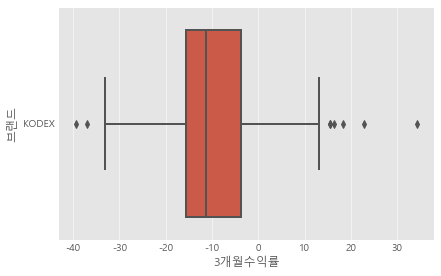

In [220]:
# KODEX 의 boxplot을 그립니다.
sns.boxplot(data=kodex, x='3개월수익률', y='브랜드')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

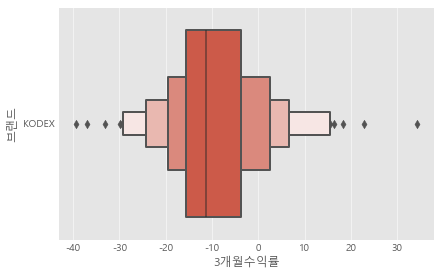

In [116]:
# KODEX 의 boxenplot을 그립니다.
sns.boxenplot(data=kodex, x='3개월수익률', y='브랜드')

<AxesSubplot:>

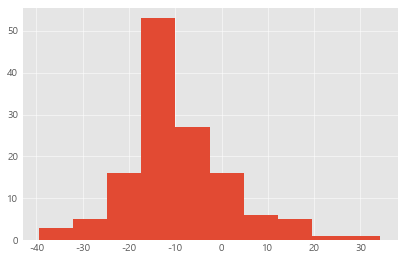

In [117]:
# KODEX 의 historam 을 pandas로 그립니다.
kodex['3개월수익률'].hist(bins=10)

<AxesSubplot:xlabel='3개월수익률', ylabel='Density'>

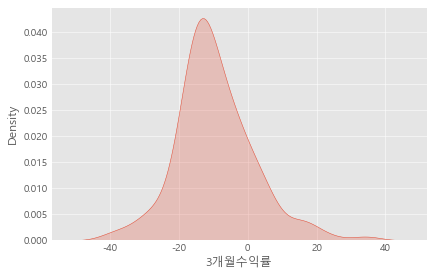

In [118]:
# KODEX 의 kdeplot 을 그립니다.
sns.kdeplot(data=kodex, x='3개월수익률', shade=True)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

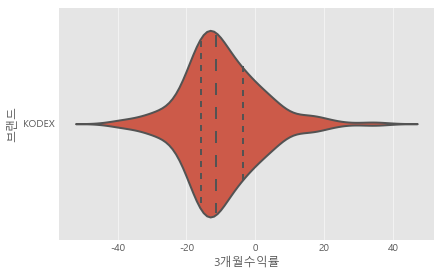

In [120]:
# KODEX 의 violinplot 을 그립니다.
sns.violinplot(data=kodex, x='3개월수익률',y='브랜드',
              cut=3, inner='quartile')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

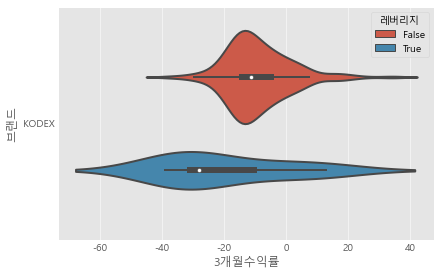

In [121]:
# KODEX 의 violinplot 에 hue="레버리지"로 그립니다.
sns.violinplot(data=kodex, x='3개월수익률',y='브랜드',
              hue='레버리지')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

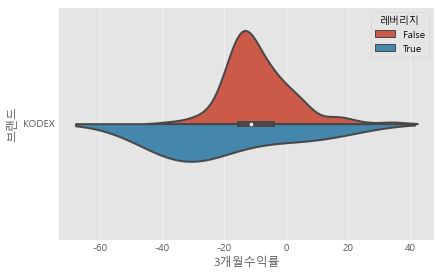

In [122]:
# KODEX 의 violinplot 에 hue="레버리지"를 split 옵션을 사용해 그립니다.
sns.violinplot(data=kodex, x='3개월수익률',y='브랜드',
              hue='레버리지', split=True)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

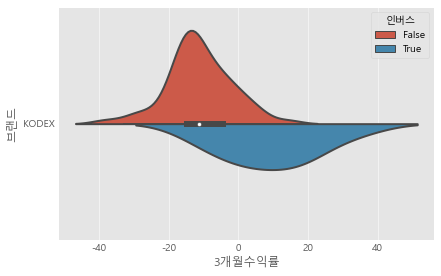

In [123]:
# KODEX 의 violinplot 에 hue="인버스"로 그립니다.
sns.violinplot(data=kodex, x='3개월수익률',y='브랜드',
              hue='인버스', split=True)

* 이미지 출처 : [The Datasaurus Dozen - Same Stats, Different Graphs | Autodesk Research](https://www.autodeskresearch.com/publications/samestats)

<img src="https://d2f99xq7vri1nk.cloudfront.net/BoxViolinSmaller.gif">

### 브랜드별 3개월수익률

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

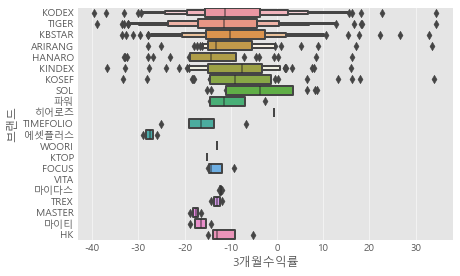

In [124]:
# boxenplot 을 통해 브랜드별 3개월 수익률을 시각화 합니다.
sns.boxenplot(data=df, x='3개월수익률', y='브랜드')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

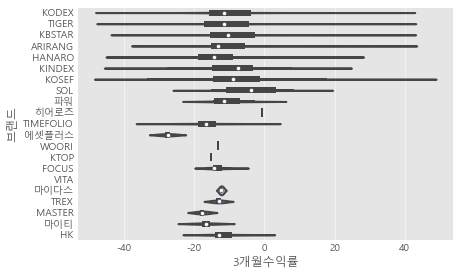

In [125]:
# violinplot은 kdeplot을 마주보도록 그린 그래프로 값의 분포를 알 수 있습니다.
# boxplot의 단점을 보완하기 위해 만들어지기도 했는데 내부에 boxplot을 함께 그려줍니다.
# 가운데 점은 중앙값을 의미합니다.
sns.violinplot(data=df, x='3개월수익률', y='브랜드')

### 서브플롯 그려보기

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

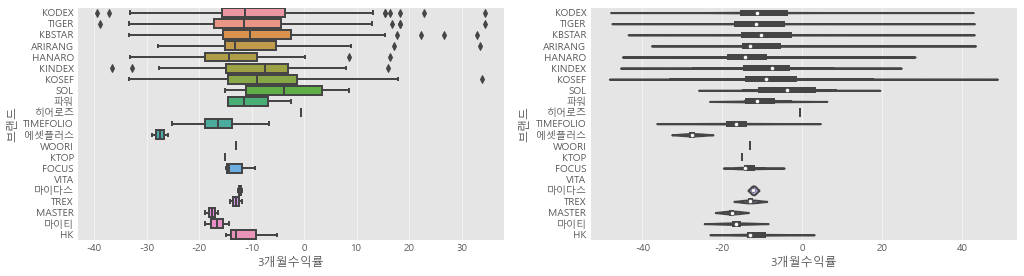

In [128]:
# boxplot과 violinplot을 하나의 그래프에 같이 그려봅니다.
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
sns.boxplot(data=df, x='3개월수익률', y='브랜드', ax=axes[0])
sns.violinplot(data=df, x='3개월수익률', y='브랜드', ax=axes[1])

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

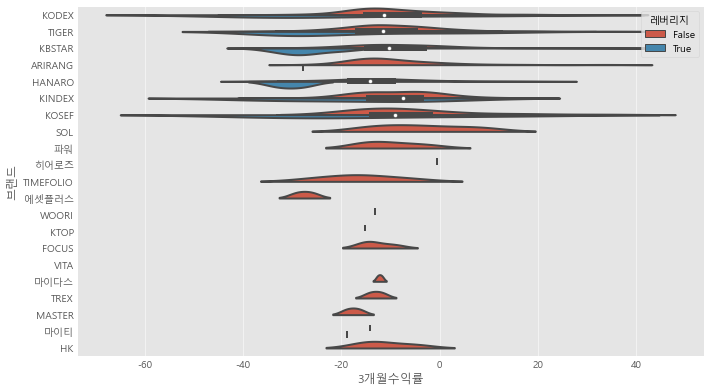

In [132]:
# violinplot은 kdeplot을 마주보도록 그린 그래프로 값의 분포를 알 수 있습니다.
# boxplot의 단점을 보완하기 위해 만들어지기도 했는데 내부에 boxplot을 함께 그려줍니다.
# 가운데 점은 중앙값을 의미합니다.
# 브랜드별 3개월수익률을 레버리지 여부에 따라 그려봅니다.
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='3개월수익률', y='브랜드', hue='레버리지', split=True)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

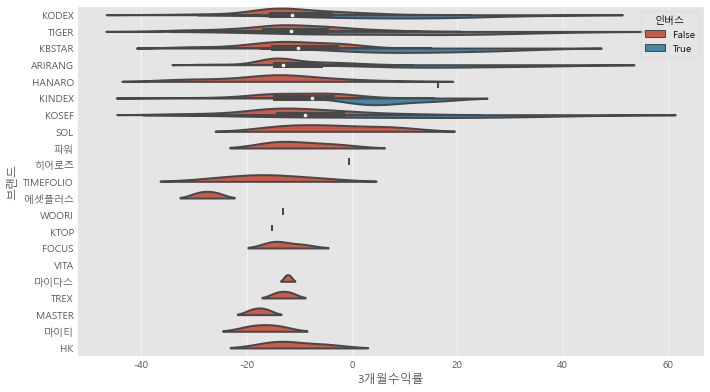

In [133]:
# 브랜드별 3개월수익률을 인버스 여부에 따라 그려봅니다.
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='3개월수익률', y='브랜드', hue='인버스', split=True)

### 브랜드별 거래량

<AxesSubplot:xlabel='거래량', ylabel='브랜드'>

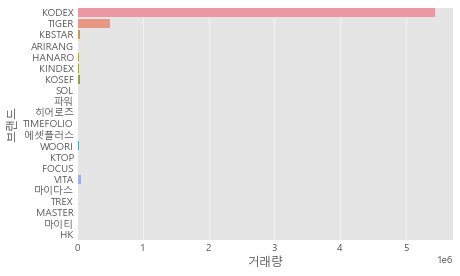

In [134]:
# 수집한 날짜에 대한 브랜드별 거래량을 봅니다.
sns.barplot(data=df, x="거래량", y="브랜드", ci=None)

In [136]:
# df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])]

<AxesSubplot:xlabel='거래량', ylabel='브랜드'>

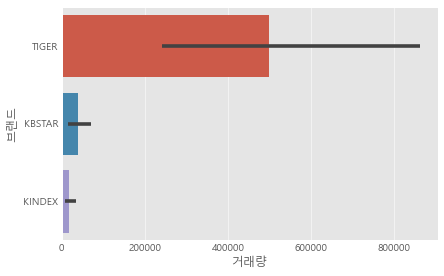

In [139]:
# 전체 브랜드를 보면 값의 크기 차이로 시각화를 제대로 보기 어렵습니다.
# 일부 브랜드 "TIGER", "KBSTAR", "KINDEX" 를 따로 가져와서 시각화 합니다.
df_listed = df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])]
sns.barplot(data=df_listed, x="거래량", y="브랜드")

<AxesSubplot:xlabel='거래량', ylabel='브랜드'>

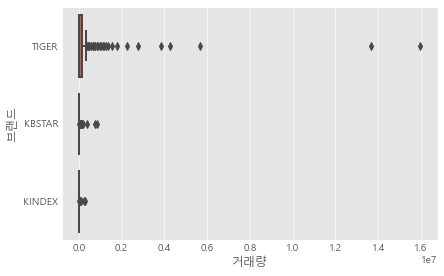

In [140]:
sns.boxplot(data=df_listed, x="거래량", y="브랜드")

<AxesSubplot:xlabel='거래량', ylabel='브랜드'>

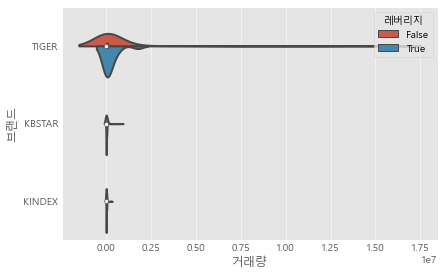

In [142]:
sns.violinplot(data=df_listed, x="거래량", y="브랜드",
              hue="레버리지", split=True)

<AxesSubplot:xlabel='거래량', ylabel='브랜드'>

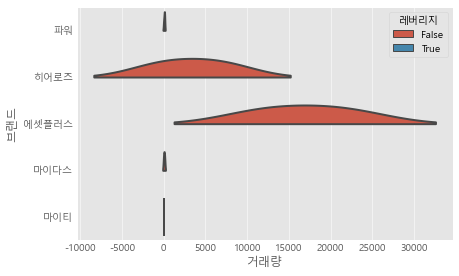

In [150]:
# "마이티", "마이다스", "흥국" 만 봅니다.
df_listed = df[df["브랜드"].isin(["마이티", "마이다스", "에셋플러스", '파워', '히어로즈'])]
sns.violinplot(data=df_listed, x="거래량", y="브랜드",
              hue="레버리지", split=True)

In [151]:
# "마이티", "마이다스", "흥국" 의 기술통계 값 보기
df_listed.groupby('브랜드')['거래량'].describe()

,count,mean,std,min,25%,50%,75%,max
브랜드,,,,,,,,
마이다스,2.0,53.00,66.468037,6.0,29.50,53.0,76.50,100.0
마이티,2.0,51.50,68.589358,3.0,27.25,51.5,75.75,100.0
에셋플러스,2.0,16896.00,6390.831088,12377.0,14636.50,16896.0,19155.50,21415.0
파워,4.0,66.75,49.982497,0.0,42.75,79.5,103.50,108.0
히어로즈,2.0,3398.50,4803.376365,2.0,1700.25,3398.5,5096.75,6795.0


### 유형에 따른 거래량

Text(0.5, 1.0, 'ETF 유형별 평균 거래량')

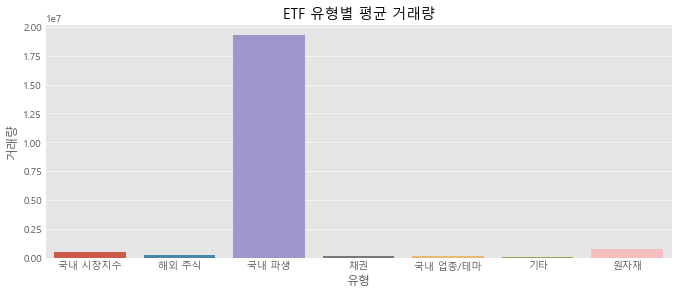

In [153]:
# 유형에 따른 평균 거래량을 barplot으로 시각화 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='유형', y='거래량',
           ci=None).set_title('ETF 유형별 평균 거래량')

In [159]:
# 위 그래프의 유형에 따른 평균 거래량을 직접 groupby를 통해 구합니다.
df.groupby(['유형'])['거래량'].mean().sort_values(ascending=False)

유형
국내 파생       1.926508e+07
원자재         7.233744e+05
국내 시장지수     4.930295e+05
해외 주식       1.802550e+05
국내 업종/테마    1.346145e+05
채권          1.044661e+05
기타          2.485835e+04
Name: 거래량, dtype: float64

### 유형에 따른 거래대금

In [161]:
# df

Text(0.5, 1.0, 'ETF 유형별 거래대금(백만)')

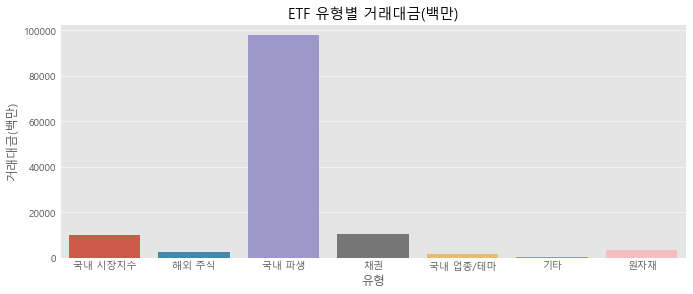

In [162]:
# 위 그래프의 유형에 따른 평균 거래대금(백만)을 barplot 으로 그립니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='유형', y='거래대금(백만)',
           ci=None).set_title('ETF 유형별 거래대금(백만)')

In [165]:
# 위 그래프의 유형에 따른 평균 거래대금(백만)을 직접 groupby를 통해 구합니다.
df.groupby(['유형'])['거래대금(백만)'].mean().sort_values(ascending=False)

유형
국내 파생       97736.918919
채권          10235.500000
국내 시장지수      9809.828125
원자재          3154.222222
해외 주식        2501.265306
국내 업종/테마     1549.169082
기타            248.800000
Name: 거래대금(백만), dtype: float64

In [169]:
# 위 그래프의 유형에 따른 평균 거래대금(백만)을 직접 pivot_table을 통해 구합니다.
pd.pivot_table(data=df, index='유형',
              values="거래대금(백만)").sort_values("거래대금(백만)", ascending=False)

,거래대금(백만)
유형,
국내 파생,97736.918919
채권,10235.500000
국내 시장지수,9809.828125
원자재,3154.222222
해외 주식,2501.265306
국내 업종/테마,1549.169082
기타,248.800000


### 유형에 따른 시가총액

Text(0.5, 1.0, '시가총액(억)')

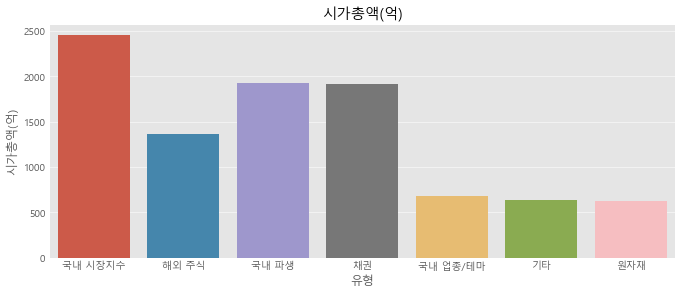

In [170]:
# 유형에 따른 평균 시가총액(억) 에 대한 시각화를 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="유형", y="시가총액(억)", 
            ci=None).set_title("시가총액(억)")

In [171]:
# 위 그래프의 유형에 따른 평균 시가총액(억)을 직접 groupby를 통해 구합니다.
df.groupby(['유형'])['시가총액(억)'].mean().sort_values(ascending=False)

유형
국내 시장지수     2449.281250
국내 파생       1920.054054
채권          1909.306452
해외 주식       1366.659864
국내 업종/테마     683.893720
기타           634.925000
원자재          618.444444
Name: 시가총액(억), dtype: float64

In [172]:
# 위 그래프의 유형에 따른 평균 시가총액(억)을 직접 pivot_table을 통해 구합니다.
pd.pivot_table(data=df, index='유형',
              values="시가총액(억)").sort_values("시가총액(억)", ascending=False)

,시가총액(억)
유형,
국내 시장지수,2449.281250
국내 파생,1920.054054
채권,1909.306452
해외 주식,1366.659864
국내 업종/테마,683.893720
기타,634.925000
원자재,618.444444


### 유형에 따른 3개월 수익률

Text(0.5, 1.0, 'ETF 유형별 3개월수익률')

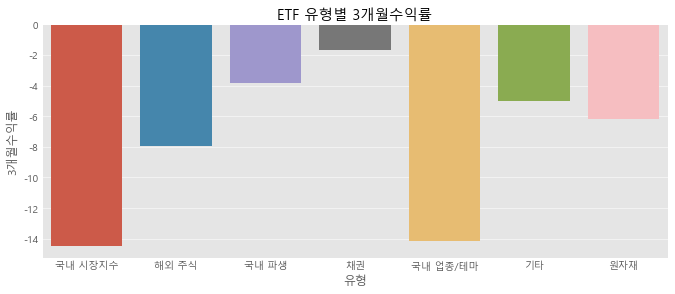

In [174]:
# 유형에 따른 평균 3개월수익률에 대한 시각화를 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="유형", y="3개월수익률", 
            ci=None).set_title("ETF 유형별 3개월수익률")

In [175]:
# 위 그래프의 유형에 따른 평균 3개월수익률을 직접 groupby를 통해 구합니다.
df.groupby(['유형'])['3개월수익률'].mean().sort_values(ascending=False)

유형
채권          -1.685882
국내 파생       -3.836924
기타          -5.009318
원자재         -6.183244
해외 주식       -7.929666
국내 업종/테마   -14.160830
국내 시장지수    -14.504855
Name: 3개월수익률, dtype: float64

In [179]:
# 위 그래프의 유형에 따른 평균 3개월수익률을 직접 pivot_table을 통해 구합니다.
pd.pivot_table(data=df, index="유형",
              values="3개월수익률").sort_values("3개월수익률", ascending=False)

,3개월수익률
유형,
채권,-1.685882
국내 파생,-3.836924
기타,-5.009318
원자재,-6.183244
해외 주식,-7.929666
국내 업종/테마,-14.160830
국내 시장지수,-14.504855


## 여러 개의 변수로 서브플롯 그리기
### PairGrid와 barplot 으로 서브플롯 그리기


* PairGrid는 한번에 서브플롯을 쉽게 그려볼 수 있는 장점이 있지만 아쉽게도 share axis in PairGrid는 지원하지 않고 있습니다.
* 참고 : https://github.com/mwaskom/seaborn/issues/1032

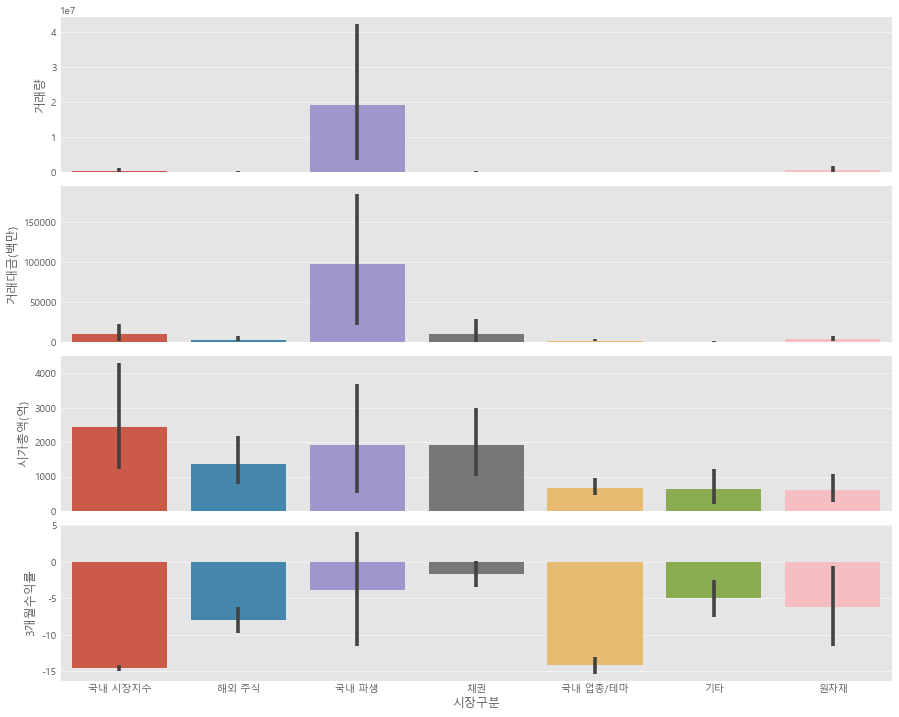

In [182]:
# PairGrid 와 barplot을 한번에 서브플롯으로 그립니다.
# 유형에 따른 "거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률" 에 대한 시각화를 합니다.
g = sns.PairGrid(data=df,
            x_vars="유형",
            y_vars=["거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률"],
            aspect=5)
g.map(sns.barplot)
g.set(xlabel="시장구분")

### subplots를 통한 시각화

In [183]:
row_cols = ["거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률"]

In [184]:
for i, rcol in enumerate(row_cols):
    print(i, rcol)

0 거래량
1 거래대금(백만)
2 시가총액(억)
3 3개월수익률


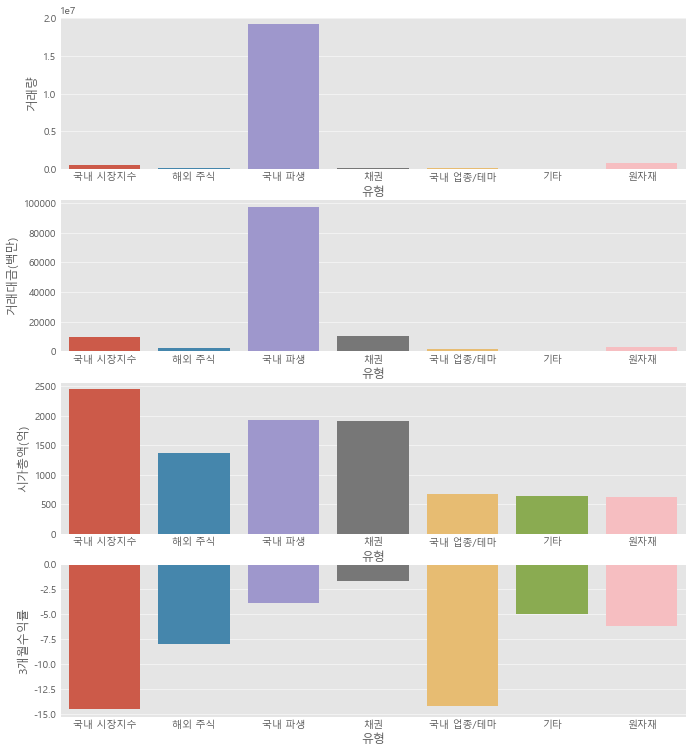

In [188]:
# 위 그래프를 직접 subplots 를 사용해 그려봅니다.
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 12))
for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x="유형",y=rcol, ax=axes[i], ci=None)

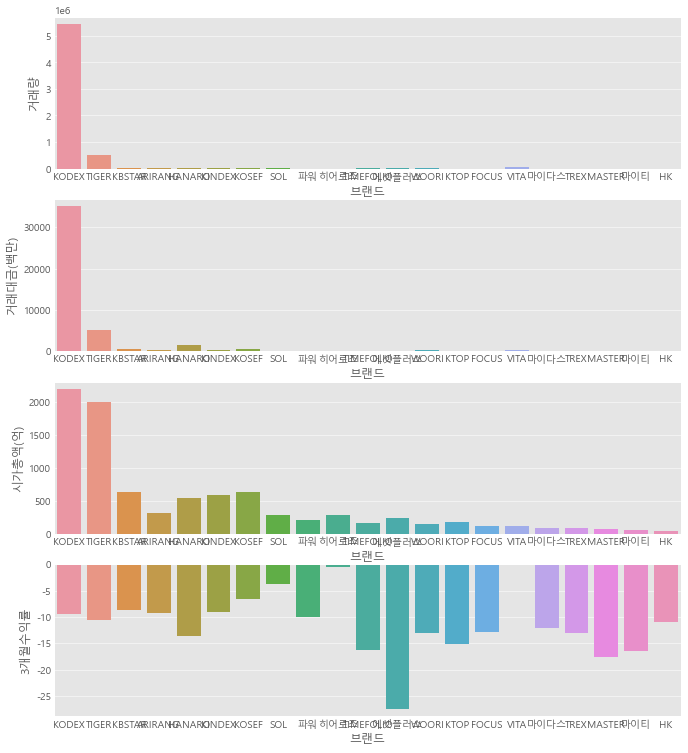

In [189]:
# 브랜드별 수치 데이터의 평균을 시각화 합니다.
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 12))
for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x="브랜드",y=rcol, ax=axes[i], ci=None)

### 브랜드별 인버스 여부에 따른 시각화

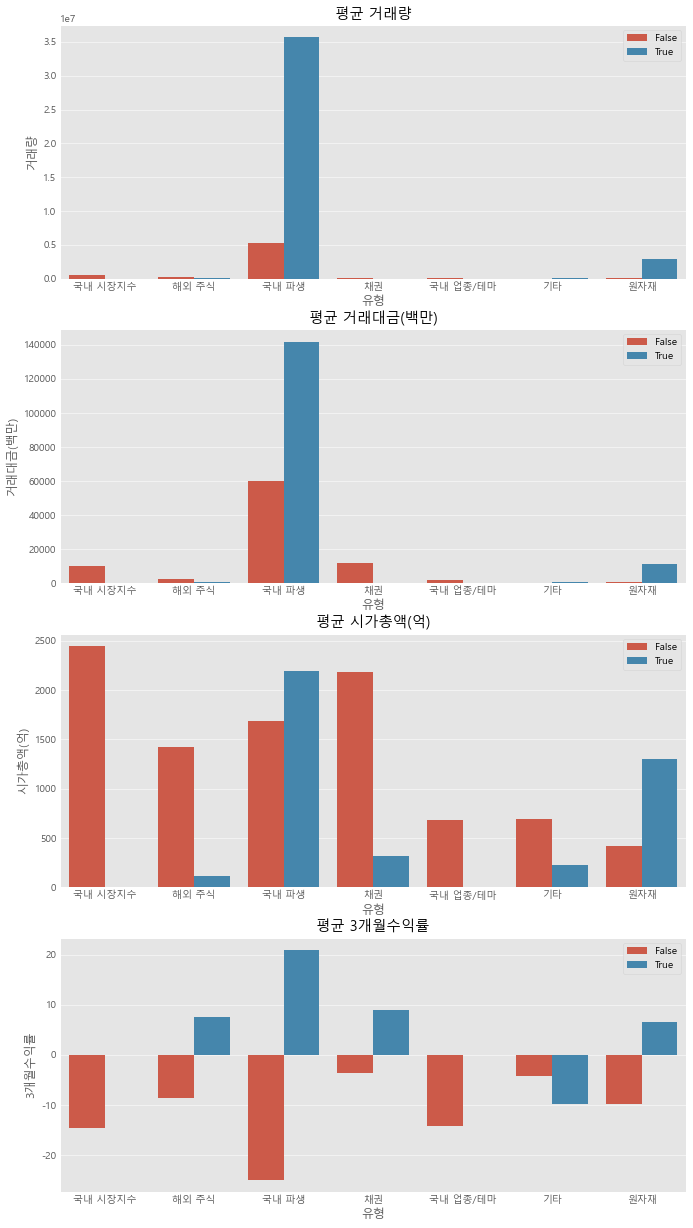

In [193]:
# subplots를 시각화 합니다. hue="인버스"를 적용해 봅니다.
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 20))
for i, rcol in enumerate(row_cols):
    g = sns.barplot(data=df, x="유형",y=rcol, hue="인버스", 
                ax=axes[i], ci=None)
    g.set_title(f"평균 {rcol}")
    g.legend(loc=1)

### 브랜드별 레버리지 여부에 따른 시각화

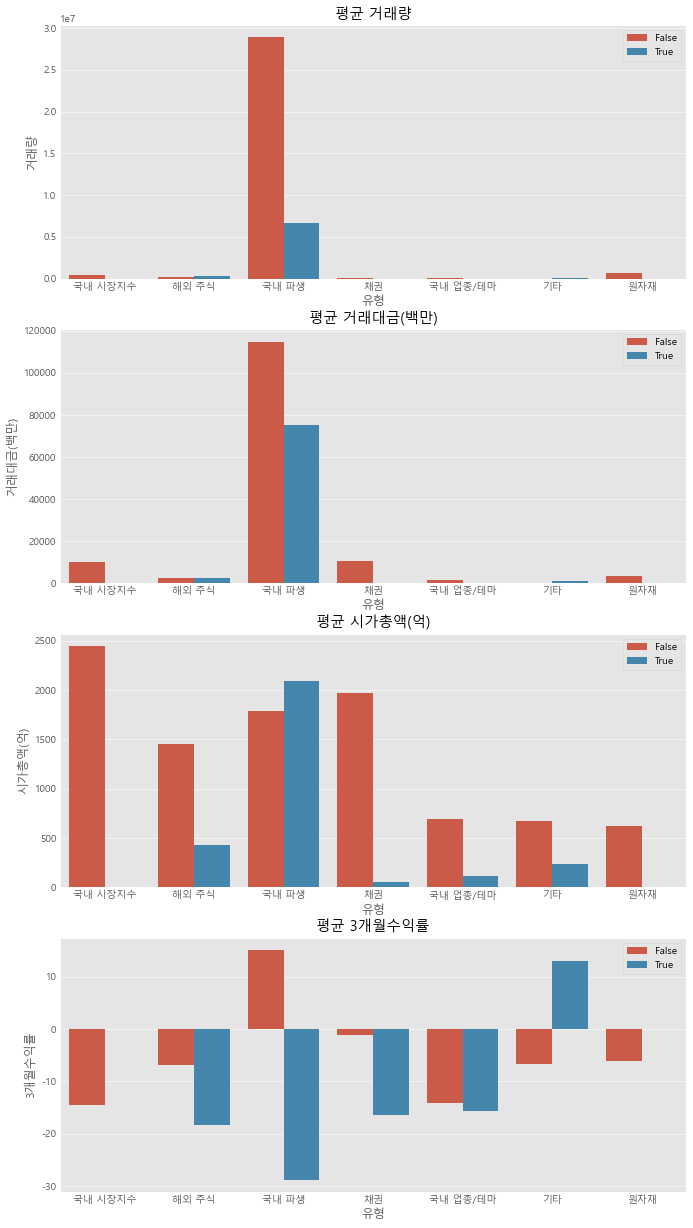

In [194]:
# subplots를 시각화 합니다. hue="레버리지"를 적용해 봅니다.
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 20))
for i, rcol in enumerate(row_cols):
    g = sns.barplot(data=df, x="유형",y=rcol, hue="레버리지", 
                ax=axes[i], ci=None)
    g.set_title(f"평균 {rcol}")
    g.legend(loc=1)

In [197]:
# 위에서 그린 서브플롯을 직접 groupby 로 구해봅니다.
gb = df.groupby(["브랜드", "레버리지"])[row_cols].mean()
gb.style.background_gradient()

### 유형에 따른 3개월 수익률 boxplot 
* barplot으로 그렸을 때 보이지 않던 데이터의 빈도수와 데이터의 분포를 확인할 수 있습니다.


<AxesSubplot:xlabel='유형', ylabel='3개월수익률'>

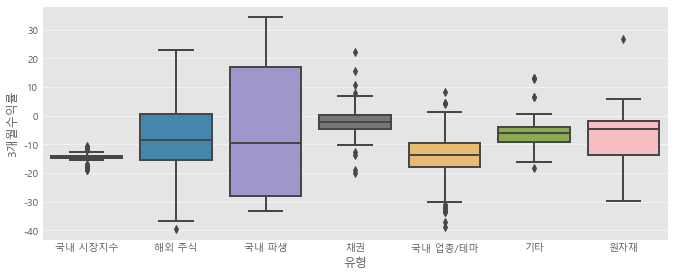

In [198]:
# boxplot 으로 x축에 "유형" y축에 "3개월수익률" 을 그려봅니다.
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='유형', y='3개월수익률')

In [202]:
# boxplot의 유형에 따른 3개월 수익률에 대한 기술통계 값을 구합니다.
df.groupby('유형')['3개월수익률'].describe()

,count,mean,std,min,25%,50%,75%,max
유형,,,,,,,,
국내 시장지수,64.0,-14.504855,1.710164,-18.9864,-14.886925,-14.41225,-13.932325,-10.4851
국내 업종/테마,202.0,-14.160830,8.054857,-38.9488,-17.802075,-13.66560,-9.569500,8.4033
국내 파생,37.0,-3.836924,24.869311,-33.3634,-27.865900,-9.69890,17.064600,34.4230
기타,34.0,-5.009318,7.775128,-18.4080,-9.142200,-5.98845,-4.040075,13.1541
원자재,18.0,-6.183244,12.047264,-29.6596,-13.590075,-4.76975,-1.904175,26.5971
채권,60.0,-1.685882,6.884361,-20.1551,-4.774175,-2.38030,0.216100,22.2385
해외 주식,132.0,-7.929666,11.046810,-39.4913,-15.388100,-8.35670,0.520850,22.7951


### subplots 로 유형에 대한 boxplot 그리기

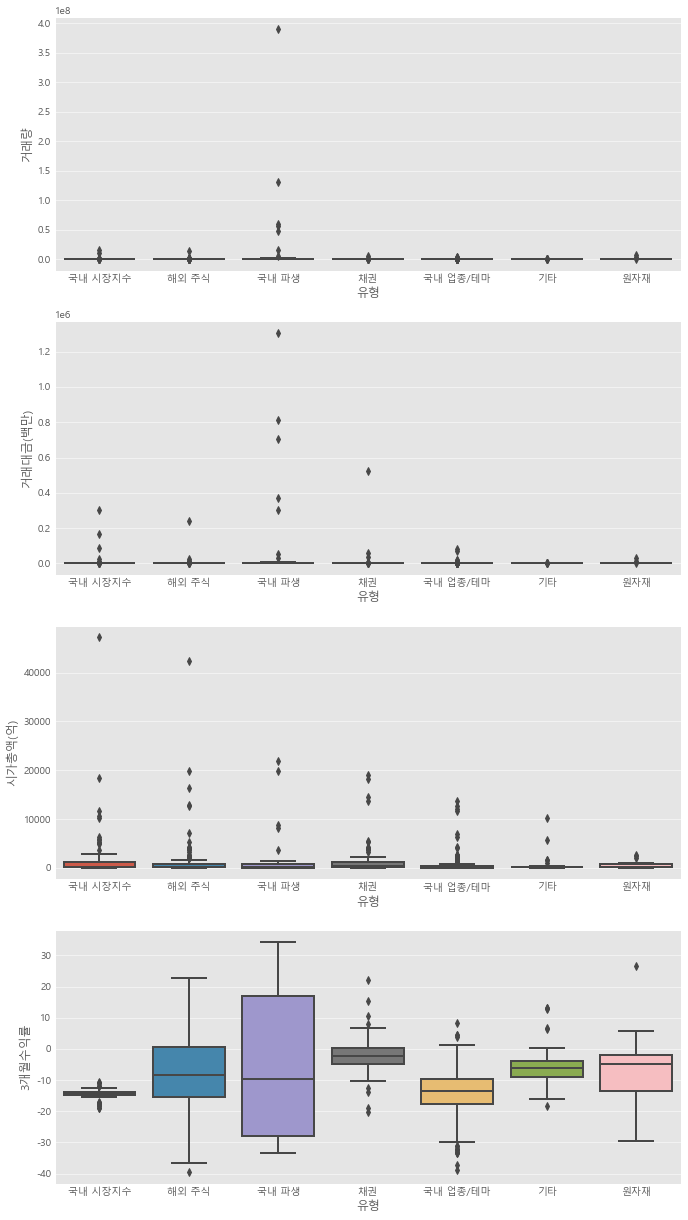

In [208]:
# subplots 를 통한 유형에 따른 수치데이터의 평균값 구하기
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 20))
for i, rcol in enumerate(row_cols):
    g = sns.boxplot(data=df, x="유형", y=rcol, ax=axes[i])
#     g.legend(loc=1)

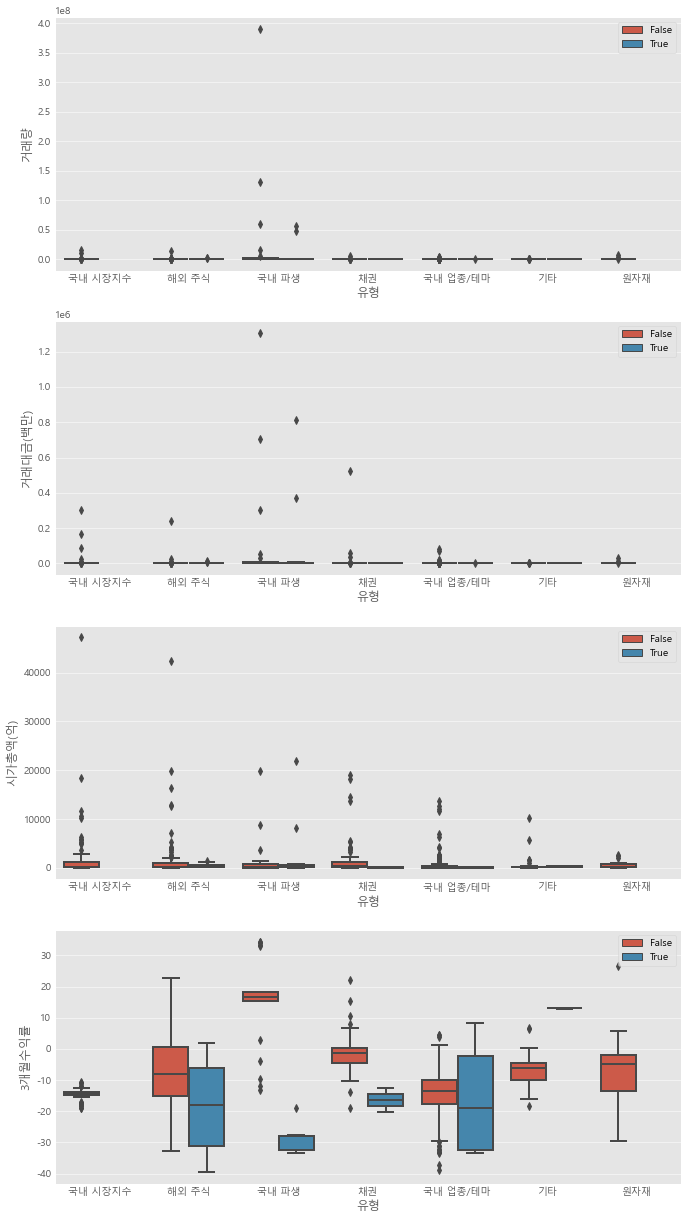

In [209]:
# hue="레버리지" 를 추가해서 그립니다.
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 20))
for i, rcol in enumerate(row_cols):
    g = sns.boxplot(data=df, x="유형", y=rcol, ax=axes[i], hue="레버리지")
    g.legend(loc=1)

### subplots 로 유형에 대한  violinplot 그리기
* boxplot으로 그렸을 때 박스 안의 분포를 좀 더 자세히 그려줍니다.

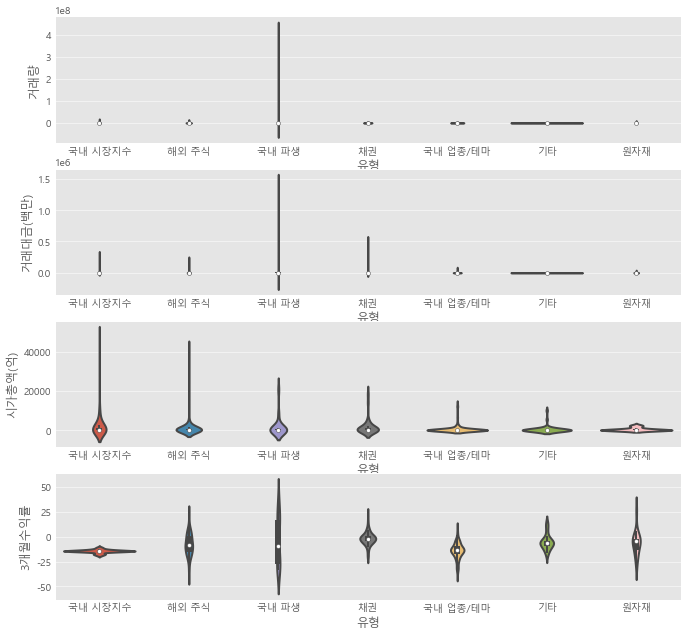

In [212]:
# 유형에 따른 violinplot 
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 10))
for i, rcol in enumerate(row_cols):
    g = sns.violinplot(data=df, x="유형", y=rcol, ax=axes[i])
#     g.legend(loc=1)

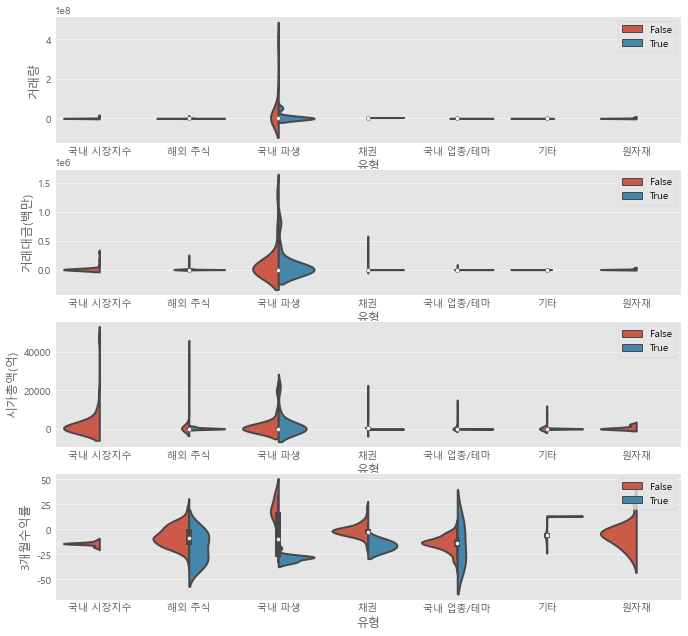

In [214]:
# 유형에 따른 violinplot 에 hue="레버리지" 적용하기
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 10))
for i, rcol in enumerate(row_cols):
    g = sns.violinplot(data=df, x="유형", y=rcol, ax=axes[i], hue="레버리지", split=True)
    g.legend(loc=1)

### PairGrid 를 통해 여러 변수의 violinplot 그리기

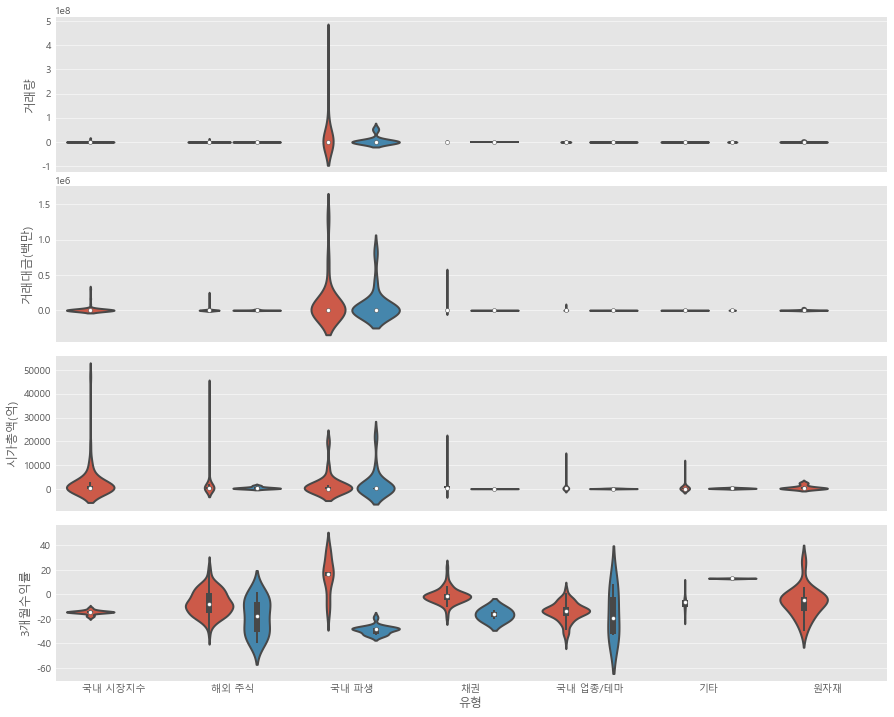

In [223]:
# 브랜드에 따른 여러 수치변수의 violinplot 를 PairGrid로 그리기
g = sns.PairGrid(data=df, 
                 x_vars='유형', y_vars=row_cols, hue="레버리지",
                aspect=5)
g.map(sns.violinplot)

### subplots 로 브랜드에 대한 boxplot 그리기

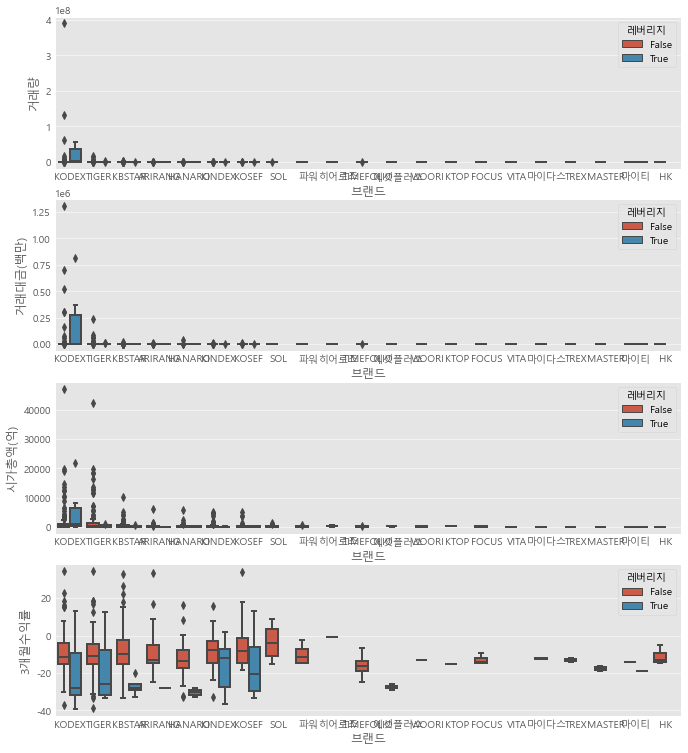

In [226]:
# 브랜드에 따른 여러 수치변수의 boxplot 을 subplots으로 그리기 : hue="레버리지"
fig, axes = plt.subplots(nrows=4, figsize=(10, 12))
for i, rcol in enumerate(row_cols):
    sns.boxplot(data=df, x="브랜드", y=rcol, ax=axes[i], hue="레버리지")

### subplots 로 브랜드에 대한 violinplot 그리기

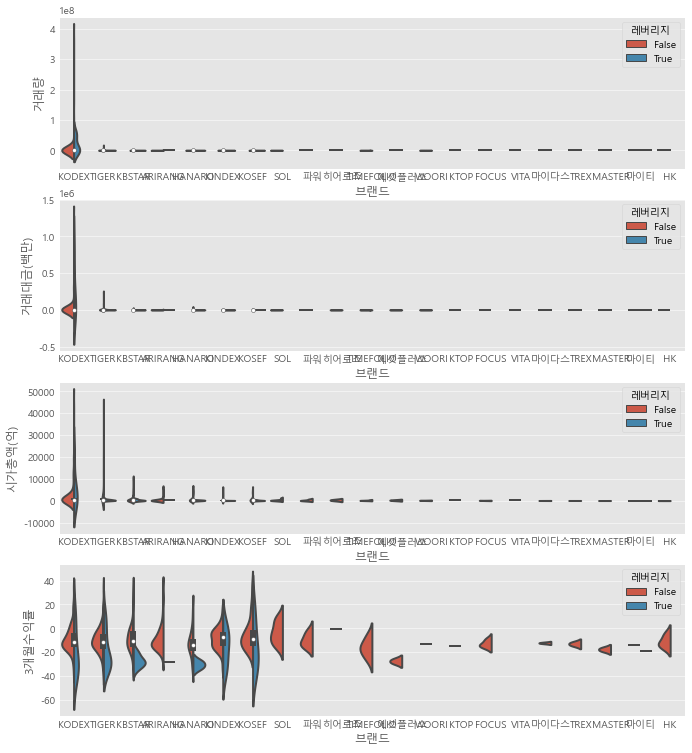

In [228]:
# 브랜드에 따른 여러 수치변수의 violinplot 을 subplots으로 그리기 : hue="레버리지"
fig, axes = plt.subplots(nrows=4, figsize=(10, 12))
for i, rcol in enumerate(row_cols):
    sns.violinplot(data=df, x="브랜드", y=rcol, ax=axes[i], hue="레버리지", split=True)

## FacetGrid 를 통한 범주형 변수에 대한 서브플롯 그리기

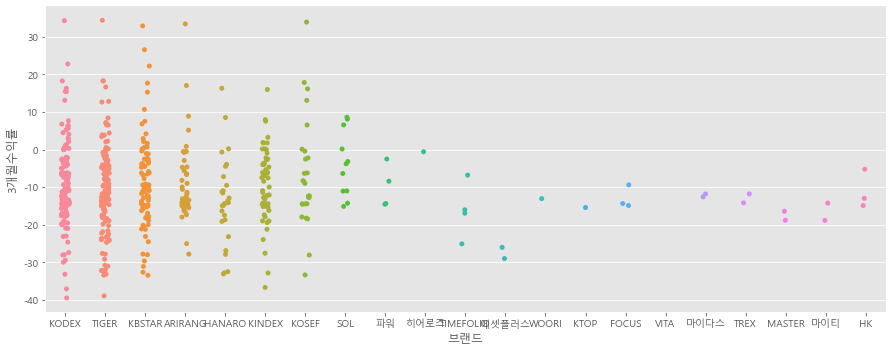

In [10]:
# catplot 을 통한 브랜드별 3개월 수익률
sns.catplot(data=df, x="브랜드", y="3개월수익률",aspect=2.5)

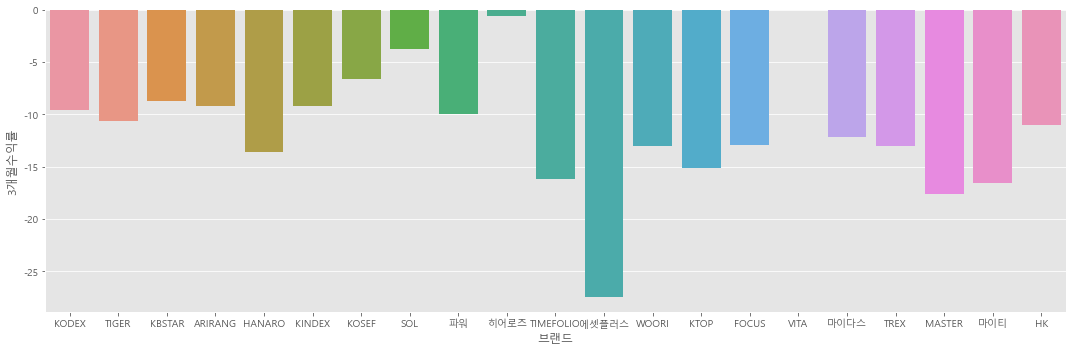

In [14]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="bar"
sns.catplot(data=df, x="브랜드", y="3개월수익률",aspect=3, kind="bar", ci=None)

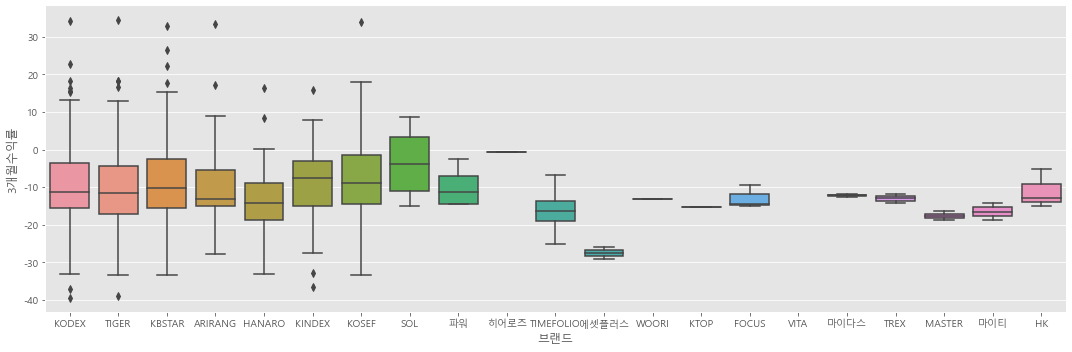

In [13]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="box"
sns.catplot(data=df, x="브랜드", y="3개월수익률",aspect=3, kind="box", ci=None)

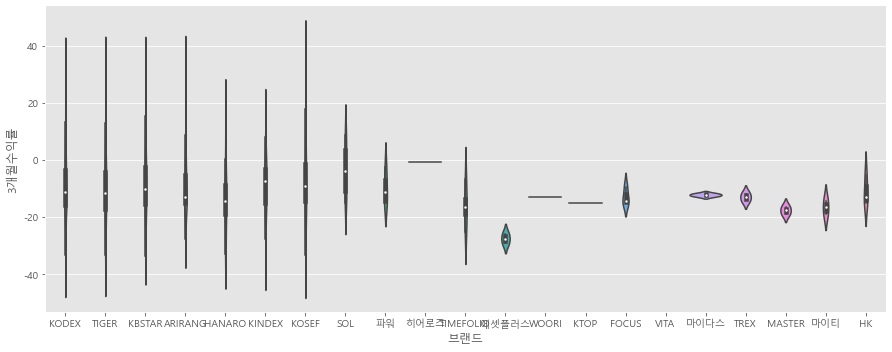

In [15]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="violin"
sns.catplot(data=df, x="브랜드", y="3개월수익률",aspect=2.5, kind="violin", ci=None)

### 특정 범주형 변수에 대한 서브플롯 그리기 - catplot
#### 브랜드 별 빈도수 - countplot

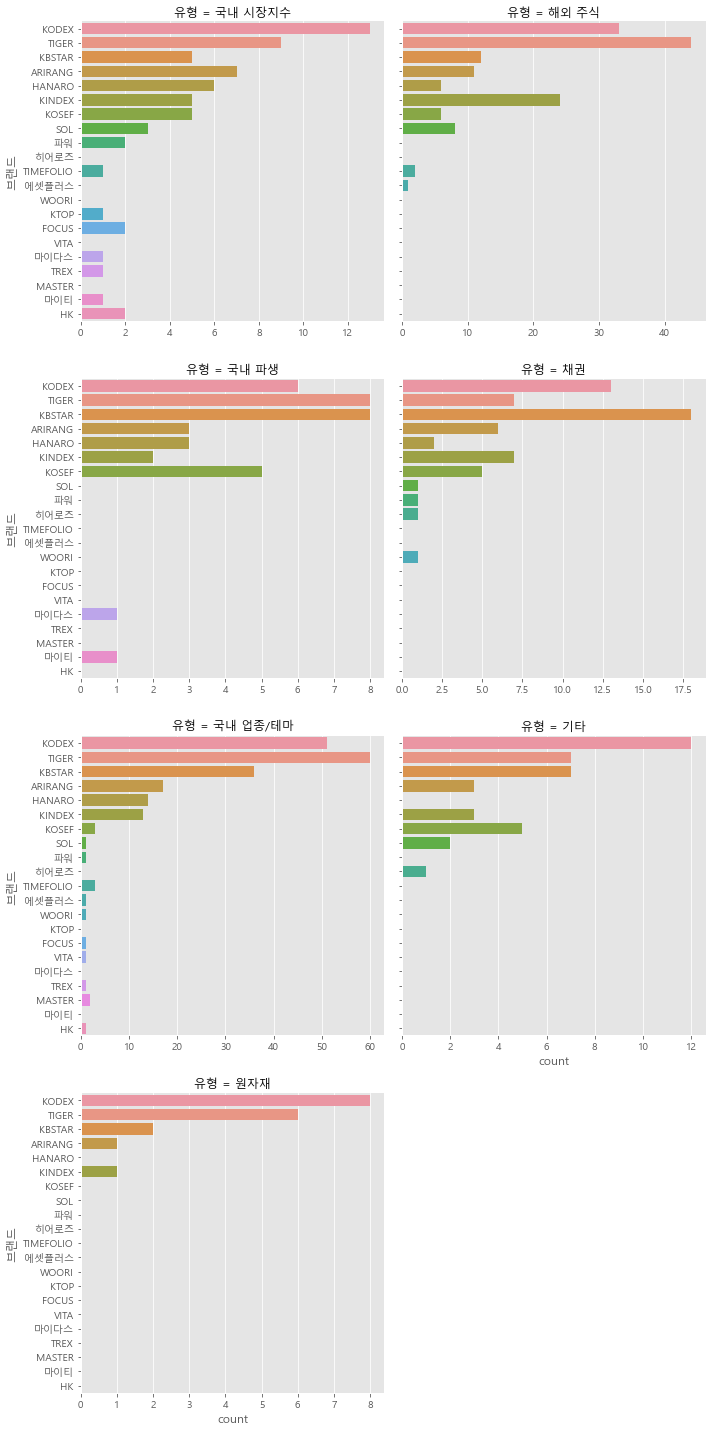

In [22]:
sns.catplot(data=df, y="브랜드", kind="count", sharex=False,
           col="유형", col_wrap=2)

#### 브랜드별 3개월 수익률 - barplot

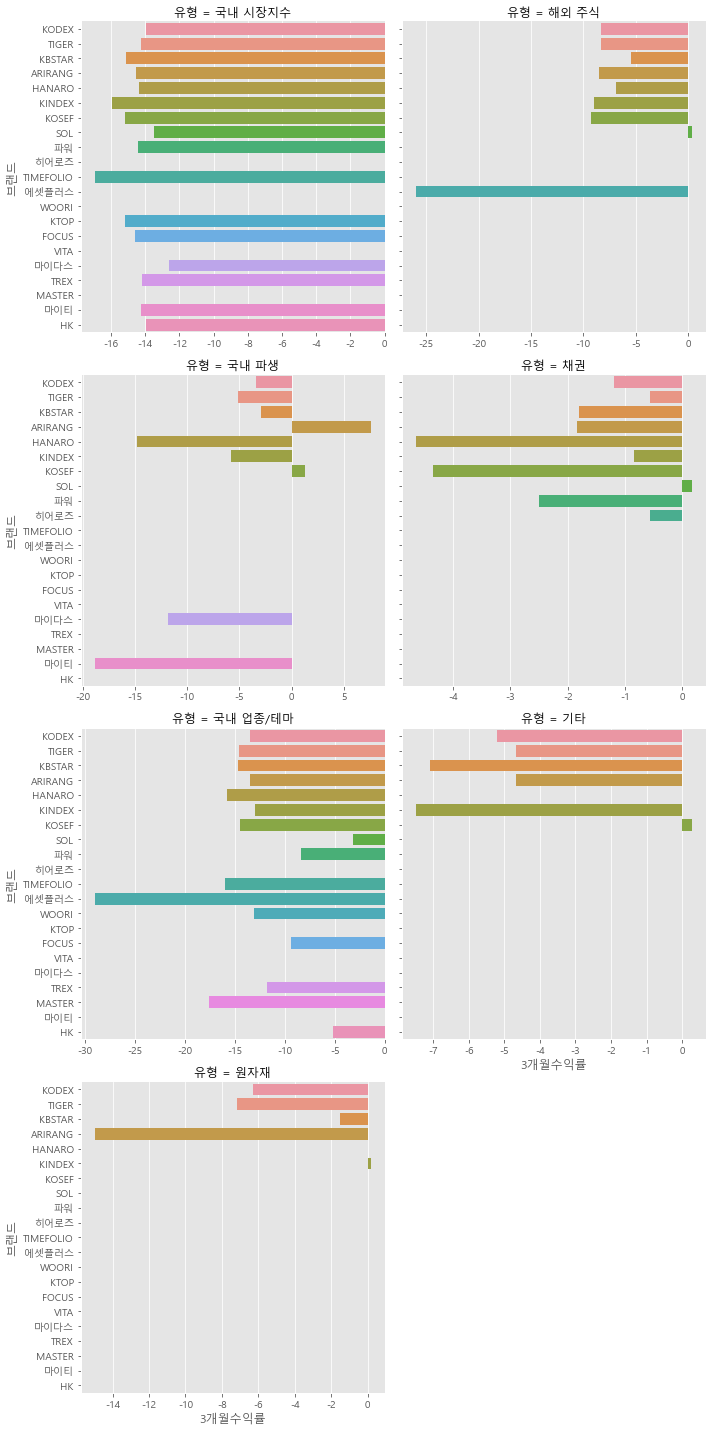

In [27]:
sns.catplot(data=df, y="브랜드", x="3개월수익률", kind="bar", ci=None,
           col="유형", col_wrap=2, sharex=False)

#### 브랜드별 거래량 - barplot

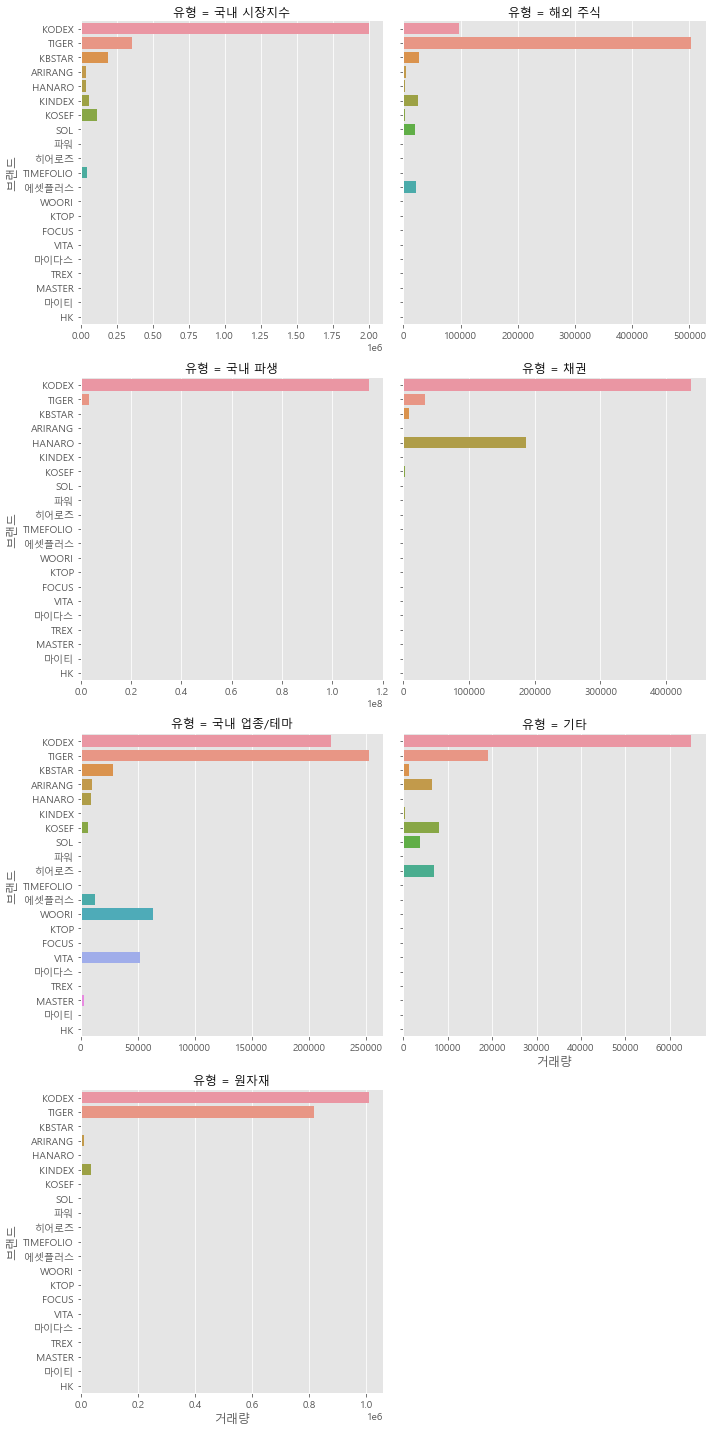

In [28]:
sns.catplot(data=df, y="브랜드", x="거래량", kind="bar", ci=None,
           col="유형", col_wrap=2, sharex=False)

## 해외 주식 ETF

In [50]:
tiger = df[df['브랜드'] == 'TIGER'][['종목명', '3개월수익률', '거래량', '유형']]

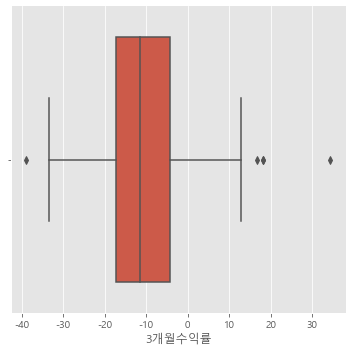

In [56]:
sns.catplot(data=tiger, x='3개월수익률', kind='box')

In [31]:
# 유형이 "해외 주식"인 ETF만 가져옵니다.
oversea = df[df["유형"] == "해외 주식"]
oversea.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
1,371460,4,TIGER 차이나전기차SOLACTIVE,17700,2,700,4.12,17844.0,12.6573,13690582,238235,42388,해외 주식,TIGER,False,False,False
3,133690,4,TIGER 미국나스닥100,67055,2,955,1.44,67176.0,-15.3487,118882,7959,19929,해외 주식,TIGER,False,False,False
8,360750,4,TIGER 미국S&P500,12280,2,150,1.24,12315.0,-10.9333,2250721,27614,16302,해외 주식,TIGER,False,False,False
12,381180,4,TIGER 미국필라델피아반도체나스닥,9145,2,75,0.83,9176.0,-18.9238,1017025,9290,12780,해외 주식,TIGER,False,False,False
14,381170,4,TIGER 미국테크TOP10 INDXX,9870,2,155,1.60,9903.0,-18.0515,567614,5595,12732,해외 주식,TIGER,False,False,False


<AxesSubplot:xlabel='브랜드', ylabel='3개월수익률'>

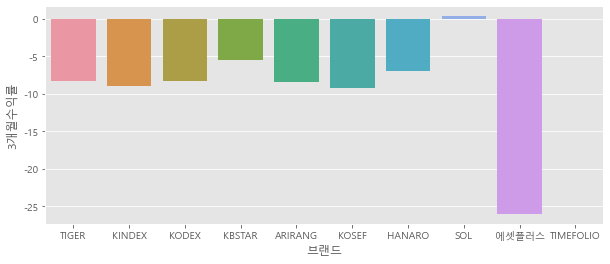

In [36]:
# "해외 주식"ETF의 브랜드별 "3개월수익률"을 시각화 합니다.
plt.figure(figsize=(10, 4))
# sns.catplot(data=oversea, y="3개월수익률", x="브랜드", kind="bar", ci=None)
sns.barplot(data=oversea, y="3개월수익률", x="브랜드", ci=None)

<AxesSubplot:xlabel='브랜드', ylabel='3개월수익률'>

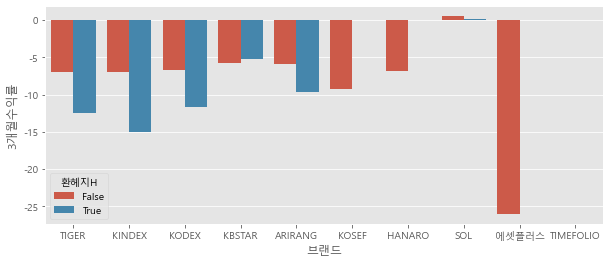

In [38]:
# "해외 주식"ETF의 브랜드별 평균 "3개월수익률"을 hue="환헤지H"로 시각화 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=oversea, y="3개월수익률", x="브랜드", ci=None, hue="환헤지H")

<AxesSubplot:xlabel='브랜드', ylabel='3개월수익률'>

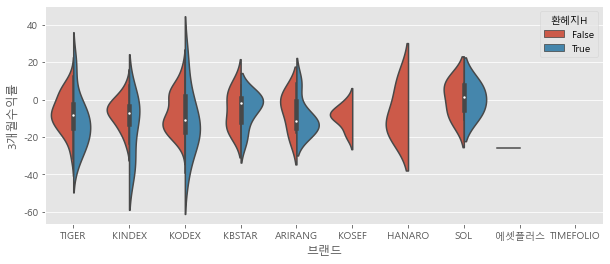

In [40]:
# "해외 주식"ETF의 브랜드별 평균 "3개월수익률"을 violinplot으로 시각화 합니다.
plt.figure(figsize=(10, 4))
sns.violinplot(data=oversea, y="3개월수익률", x="브랜드", ci=None, hue="환헤지H", split=True)

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

C:\Users\HANON\.conda\envs\DA\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


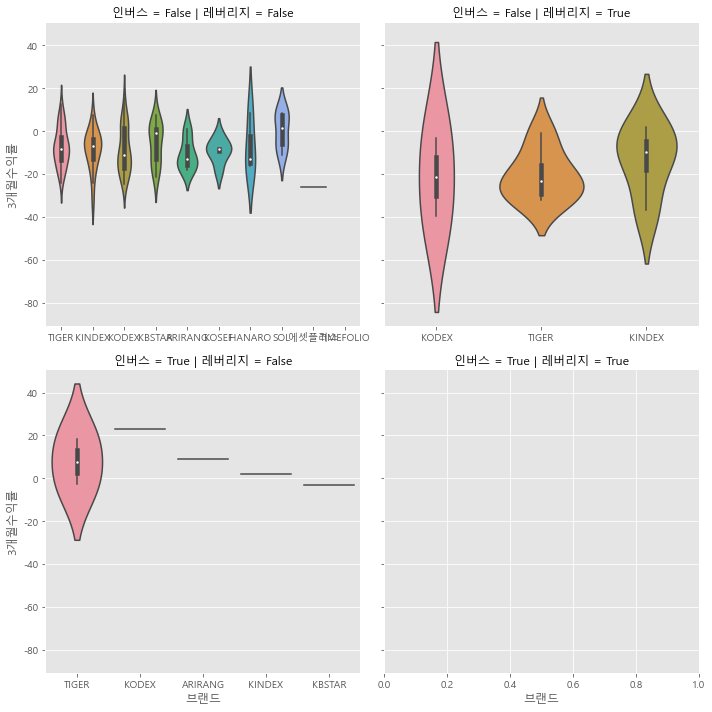

In [43]:
# 위에서 그린 그래프를 catplot을 통해 그리며  col="레버리지", row="인버스"로 시각화 합니다.
sns.catplot(data=oversea, y="3개월수익률", x="브랜드", ci=None, split=True, sharex=False,
           kind="violin", col="레버리지", row="인버스")


## 상관분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width=500>

* 출처 :  https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98



### 상관계수 구하기

In [59]:
# 전체 데이터프레임에 대한 상관계수를 구합니다.
corr = df.corr()

In [66]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 만듬

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
mask = np.triu(np.ones_like(corr))
# mask

<AxesSubplot:>

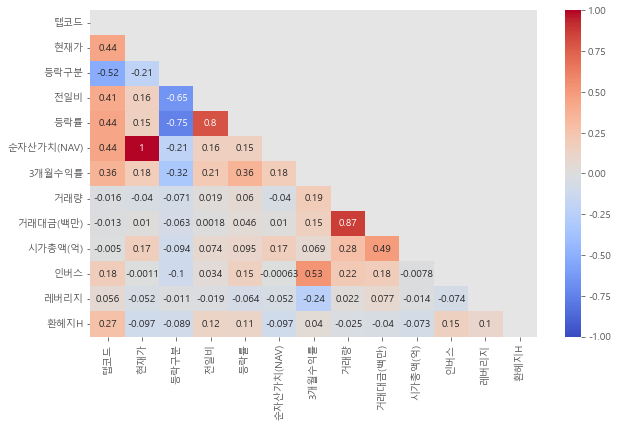

In [67]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask)

### 양 혹은 음의 상관 계수가 높은 변수끼리의 regplot 그리기

<AxesSubplot:xlabel='전일비', ylabel='등락률'>

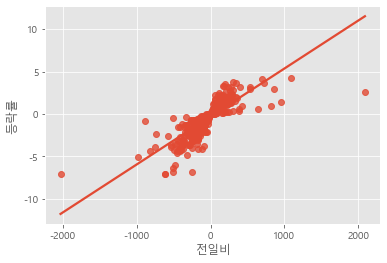

In [71]:
# regplot을 통해 양의 상관 계수가 높은 변수끼리 시각화 합니다.
sns.regplot(data=df, x="전일비", y='등락률', ci=None)

<AxesSubplot:xlabel='등락구분', ylabel='등락률'>

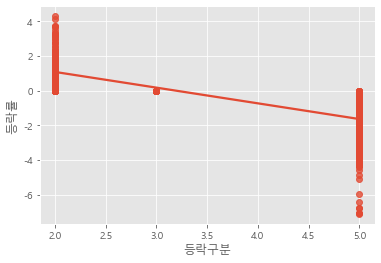

In [73]:
# regplot을 통해 음의 상관 계수가 높은 변수끼리 시각화 합니다.
sns.regplot(data=df, x="등락구분", y='등락률', ci=None)

### 종목별 상관 계수

In [77]:
# select_dtypes 를 통해 object 타입을 제외한 타입을 제외하고 가져오록 합니다.
# 종목명을 인덱스로 만들어 줍니다.
df_num = df.select_dtypes(exclude=object).copy()
df_num["종목명"] = df["종목명"]
df_num = df_num.set_index("종목명")
df_num.head()

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),인버스,레버리지,환헤지H
종목명,,,,,,,,,,,,,
KODEX 200,1,30640,5,-250,-0.81,30607.0,-14.4298,9784052,301620,47247,False,False,False
TIGER 차이나전기차SOLACTIVE,4,17700,2,700,4.12,17844.0,12.6573,13690582,238235,42388,False,False,False
KODEX 레버리지,3,14135,5,-185,-1.29,14147.0,-28.0583,57013787,815169,21909,False,True,False
TIGER 미국나스닥100,4,67055,2,955,1.44,67176.0,-15.3487,118882,7959,19929,False,False,False
KODEX 200선물인버스2X,3,3385,2,40,1.20,3386.0,34.3373,390559840,1305629,19779,True,False,False


In [79]:
# transpose 로 행과 열을 바꿉니다.
df_t = df_num.T

In [82]:
# df_t의 데이터 타입을 float 으로 변경하고 상관 계수 구하기
etf_corr = df_t.astype(float).corr()
etf_corr

종목명,KODEX 200,TIGER 차이나전기차SOLACTIVE,KODEX 레버리지,TIGER 미국나스닥100,KODEX 200선물인버스2X,KODEX 단기채권PLUS,TIGER 200,TIGER 단기통안채,TIGER 미국S&P500,KODEX 단기채권,...,KBSTAR 모멘텀로우볼,ARIRANG KRX300헬스케어,ARIRANG 코스닥150,KBSTAR 200커뮤니케이션서비스,KBSTAR 200철강소재,KBSTAR 모멘텀밸류,KBSTAR 200에너지화학,KBSTAR 200생활소비재,KBSTAR 200산업재,KBSTAR 200경기소비재
종목명,,,,,,,,,,,,,,,,,,,,,
KODEX 200,1.000000,0.999912,0.999863,0.766136,0.999632,0.968150,0.999944,-0.102529,0.999809,0.997260,...,-0.122058,-0.114116,0.233867,-0.122967,0.339602,-0.119138,-0.050291,-0.119230,-0.105122,-0.081845
TIGER 차이나전기차SOLACTIVE,0.999912,1.000000,0.999992,0.765330,0.999903,0.966983,0.999849,-0.103068,0.999960,0.996215,...,-0.122552,-0.114585,0.233425,-0.123431,0.339215,-0.119632,-0.050779,-0.119701,-0.105623,-0.082317
KODEX 레버리지,0.999863,0.999992,1.000000,0.764488,0.999941,0.966513,0.999789,-0.104007,0.999953,0.995961,...,-0.123186,-0.115214,0.232802,-0.124055,0.338619,-0.120265,-0.051416,-0.120327,-0.106260,-0.082946
TIGER 미국나스닥100,0.766136,0.765330,0.764488,1.000000,0.764828,0.896640,0.772912,0.558186,0.769319,0.773808,...,0.529737,0.536400,0.789379,0.528757,0.850385,0.532097,0.588451,0.531956,0.543804,0.562914
KODEX 200선물인버스2X,0.999632,0.999903,0.999941,0.764828,1.000000,0.965803,0.999571,-0.102757,0.999929,0.994964,...,-0.122026,-0.114035,0.233917,-0.122873,0.339712,-0.119105,-0.050253,-0.119150,-0.105105,-0.081771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KBSTAR 모멘텀밸류,-0.119138,-0.119632,-0.120265,0.532097,-0.119105,0.121765,-0.108732,0.991154,-0.113935,-0.104592,...,0.999995,0.999888,0.937394,0.999824,0.893315,1.000000,0.997607,0.999910,0.999885,0.999263
KBSTAR 200에너지화학,-0.050291,-0.050779,-0.051416,0.588451,-0.050253,0.189728,-0.039828,0.989836,-0.045050,-0.035932,...,0.997398,0.997804,0.959213,0.997117,0.922232,0.997607,1.000000,0.997480,0.998479,0.999441
KBSTAR 200생활소비재,-0.119230,-0.119701,-0.120327,0.531956,-0.119150,0.121550,-0.108826,0.991078,-0.114000,-0.104789,...,0.999908,0.999974,0.937126,0.999979,0.893073,0.999910,0.997480,1.000000,0.999718,0.999280


* "KODEX 200" 과 상관계수가 높은 ETF 상위 10개

In [86]:
# "KODEX 200" 과 상관계수가 높은 ETF 상위 10개
etf_corr["KODEX 200"].sort_values(ascending=False).head(10)

종목명
KODEX 200                1.000000
TIGER 200                0.999944
TIGER 2차전지테마             0.999922
KODEX 2차전지산업             0.999920
TIGER 차이나전기차SOLACTIVE    0.999912
KODEX 레버리지               0.999863
TIGER 미국S&P500           0.999809
KODEX 코스닥150             0.999797
TIGER KRX2차전지K-뉴딜        0.999789
KODEX 코스닥150레버리지         0.999741
Name: KODEX 200, dtype: float64

* "KODEX 200" 과 상관계수가 낮은 ETF 하위 10개

In [85]:
# "KODEX 200" 과 상관계수가 낮은 ETF 하위 10개
etf_corr["KODEX 200"].sort_values().head(10)

종목명
HANARO 미국S&P500         -0.136568
WOORI 대한민국국고채액티브        -0.136442
TIMEFOLIO 미국S&P500액티브   -0.136076
KBSTAR 국채선물3년           -0.135723
KODEX KOFR금리액티브(합성)     -0.133104
KOSEF 물가채KIS            -0.132845
HANARO MSCI Korea TR    -0.132460
TIGER CD금리투자KIS(합성)     -0.130990
HANARO 200 TOP10        -0.130100
SOL 한국형글로벌플랫폼&메타버스액티브   -0.129809
Name: KODEX 200, dtype: float64

### 2X ETF의 상관계수

In [89]:
# 2X가 들어가는 ETF의 상관 계수만 가져오기
etf_corr_2x = etf_corr.filter(regex="2X").filter(regex="2X", axis=0)
etf_corr_2x

종목명,KODEX 200선물인버스2X,TIGER 200선물인버스2X,KODEX 미국달러선물인버스2X,KBSTAR 200선물인버스2X,KOSEF 미국달러선물인버스2X,ARIRANG 200선물인버스2X,KOSEF 200선물인버스2X,TIGER 미국달러선물인버스2X,KBSTAR 미국장기국채선물인버스2X(합성 H)
종목명,,,,,,,,,
KODEX 200선물인버스2X,1.000000,1.000000,0.999456,0.999982,0.871690,0.999366,0.999799,0.736403,0.858994
TIGER 200선물인버스2X,1.000000,1.000000,0.999465,0.999984,0.871818,0.999375,0.999804,0.736580,0.859128
KODEX 미국달러선물인버스2X,0.999456,0.999465,1.000000,0.999632,0.887281,0.999996,0.999911,0.758172,0.875311
KBSTAR 200선물인버스2X,0.999982,0.999984,0.999632,1.000000,0.874585,0.999558,0.999900,0.740404,0.862015
KOSEF 미국달러선물인버스2X,0.871690,0.871818,0.887281,0.874585,1.000000,0.888517,0.881347,0.973408,0.999613
ARIRANG 200선물인버스2X,0.999366,0.999375,0.999996,0.999558,0.888517,1.000000,0.999876,0.759933,0.876612
KOSEF 200선물인버스2X,0.999799,0.999804,0.999911,0.999900,0.881347,0.999876,1.000000,0.749830,0.869091
TIGER 미국달러선물인버스2X,0.736403,0.736580,0.758172,0.740404,0.973408,0.759933,0.749830,1.000000,0.978917
KBSTAR 미국장기국채선물인버스2X(합성 H),0.858994,0.859128,0.875311,0.862015,0.999613,0.876612,0.869091,0.978917,1.000000


In [92]:
# np.ones_like로 heatmap의 마스크값 구하기
mask_2x = np.triu(np.ones_like(etf_corr_2x))

<AxesSubplot:xlabel='종목명', ylabel='종목명'>

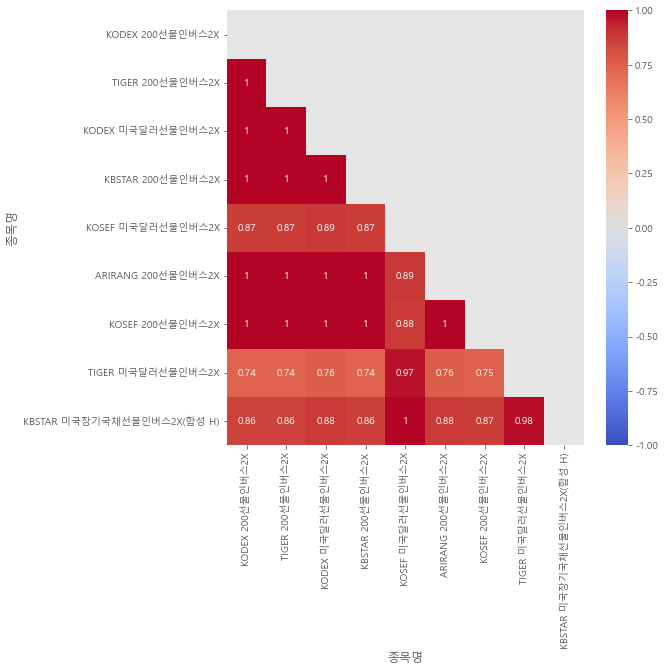

In [102]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기
plt.figure(figsize=(8, 8))
sns.heatmap(etf_corr_2x, cmap="coolwarm", vmax=1, vmin=-1, mask=mask_2x, annot=True)

### 원유와 관련된 ETF의 상관계수 보기

In [103]:
# 원유가 들어가는 상관계수만 가져오기
etf_corr_oil = etf_corr.filter(regex="원유").filter(regex="원유", axis=0)

In [104]:
# np.ones_like로 heatmap의 마스크값 구하기
mask_oil = np.triu(np.ones_like(etf_corr_oil))

<AxesSubplot:xlabel='종목명', ylabel='종목명'>

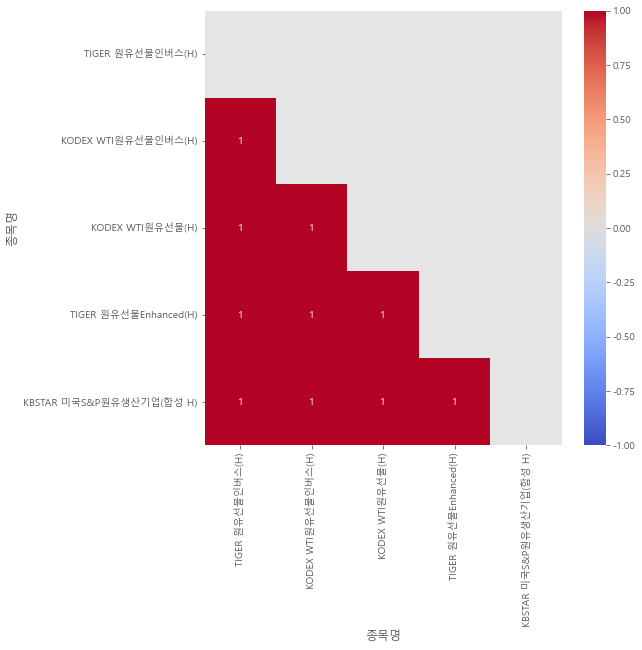

In [108]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기
plt.figure(figsize=(8, 8))
sns.heatmap(etf_corr_oil, cmap="coolwarm", vmax=1, vmin=-1, mask=mask_oil, annot=True)

## seaborn 공식문서

* seaborn 에 대해 좀 더 알고 싶다면 다음의 튜토리얼을 참고해 보세요.
* [User guide and tutorial — seaborn documentation](https://seaborn.pydata.org/tutorial.html)